# MODELO PREDICTIVO

Lo primero es juntar las 4 tablas pivotadas:

1. Datos demogarficos
2. Comorbilidades
3. Medicación
4. Pruebas Médicas

In [1]:
import pandas as pd
df_demografico=pd.read_excel(r"C:\Users\LauraR\Documents\laura\Master\TFM\Limpieza BBDD\Datos demograficos\datos_demograficos_diabeticos.xlsx")
df_comorbilidades=pd.read_excel(r"C:\Users\LauraR\Documents\laura\Master\TFM\Limpieza BBDD\Comorbilidades\Comorbilidades.xlsx")
df_med=pd.read_excel(r"C:\Users\LauraR\Documents\laura\Master\TFM\Limpieza BBDD\Medicacion\dosis_med_pacientes.xlsx")
df_lab=pd.read_excel(r"C:\Users\LauraR\Documents\laura\Master\TFM\Limpieza BBDD\Pruebas medicas\df_labevents_imputado_custom_vf.xlsx")


In [2]:
df_demografico.head()

patient_id           admittime gender  anchor_age        dod  \
0  1000297627179825 2145-02-28 19:44:00      M          70        NaT   
1  1001088820162667 2174-01-09 22:19:00      M          43        NaT   
2  1001356921741511 2165-01-14 23:05:00      F          54        NaT   
3  1002323929295881 2137-06-19 17:35:00      F          29        NaT   
4  1003075326429826 2190-09-27 05:08:00      F          47 2201-06-10   

  deathtime  
0       NaT  
1       NaT  
2       NaT  
3       NaT  
4       NaT

In [3]:
df_demografico.shape[0]

2220

In [4]:
df_comorbilidades.head()

Unnamed: 0  subject_id   hadm_id        patient_id      admittime gender  \
0           1    10002976  27179825  1000297627179825  28/2/45 19:44      M   
1           2    10002976  27179825  1000297627179825  28/2/45 19:44      M   
2           3    10002976  27179825  1000297627179825  28/2/45 19:44      M   
3           5    10002976  27179825  1000297627179825  28/2/45 19:44      M   
4           6    10002976  27179825  1000297627179825  28/2/45 19:44      M   

   anchor_age  dod icd_code  icd_version  \
0          70  NaN     5849            9   
1          70  NaN  V5867              9   
2          70  NaN      412            9   
3          70  NaN     4019            9   
4          70  NaN  V4582              9   

                                          LONG TITLE  \
0                  Acute kidney failure, unspecified   
1                 Long-term (current) use of insulin   
2                          Old myocardial infarction   
3                 Unspecified essential hypertension   
4  Percutaneous transluminal coronary angioplasty...   

                     CATEGORÍA  
0          Insuficiencia Renal  
1  Metabólicas Y Nutricionales  
2                  Cardiología  
3                  Cardiología  
4                  Cardiología

In [5]:
df_comorbilidades=df_comorbilidades.drop(['Unnamed: 0','subject_id', 'hadm_id','admittime','gender','anchor_age','dod'], axis=1)
df_comorbilidades.head()

patient_id icd_code  icd_version  \
0  1000297627179825     5849            9   
1  1000297627179825  V5867              9   
2  1000297627179825      412            9   
3  1000297627179825     4019            9   
4  1000297627179825  V4582              9   

                                          LONG TITLE  \
0                  Acute kidney failure, unspecified   
1                 Long-term (current) use of insulin   
2                          Old myocardial infarction   
3                 Unspecified essential hypertension   
4  Percutaneous transluminal coronary angioplasty...   

                     CATEGORÍA  
0          Insuficiencia Renal  
1  Metabólicas Y Nutricionales  
2                  Cardiología  
3                  Cardiología  
4                  Cardiología

In [6]:
df_comorbilidades.shape[0]

10085

In [7]:
df_comorbilidades_pivotada=pd.pivot_table(df_comorbilidades, 
                          index='patient_id', 
                          columns='CATEGORÍA', 
                          aggfunc='size', 
                          fill_value=0)
# Renombrar las columnas para que contengan 1 si la enfermedad está presente
df_comorbilidades_pivotada[df_comorbilidades_pivotada > 0] = 1

In [8]:
df_comorbilidades_pivotada.shape[0]

2119

In [9]:
df_comorbilidades_pivotada.head()

CATEGORÍA         Cardiología  Cirugía / Procedimientos Médicos  \
patient_id                                                        
1000297627179825            1                                 0   
1001088820162667            0                                 0   
1001356921741511            1                                 0   
1002323929295881            0                                 0   
1003075326429826            1                                 0   

CATEGORÍA         Enfermedades Infecciosas  \
patient_id                                   
1000297627179825                         0   
1001088820162667                         0   
1001356921741511                         0   
1002323929295881                         1   
1003075326429826                         0   

CATEGORÍA         Factores Sociales / Exposición / Historial  \
patient_id                                                     
1000297627179825                                           0   
1001088820162667                                           0   
1001356921741511                                           0   
1002323929295881                                           0   
1003075326429826                                           1   

CATEGORÍA         Gastroenterología / Digestivo  Insuficiencia Renal  \
patient_id                                                             
1000297627179825                              0                    1   
1001088820162667                              0                    1   
1001356921741511                              0                    0   
1002323929295881                              0                    0   
1003075326429826                              1                    0   

CATEGORÍA         Metabólicas Y Nutricionales  Nefrología  Neumología  \
patient_id                                                              
1000297627179825                            1           0           0   
1001088820162667                            1           0           0   
1001356921741511                            1           1           0   
1002323929295881                            1           0           0   
1003075326429826                            1           1           0   

CATEGORÍA         Oncología  Reumatología  Salud Mental Y Neurológica  
patient_id                                                             
1000297627179825          0             1                           0  
1001088820162667          0             0                           0  
1001356921741511          0             0                           0  
1002323929295881          0             0                           1  
1003075326429826          0             1                           0

En el caso de comorbilidades, 0=no tiene la enfermedad y 1=tiene la enfermedad

In [10]:
df_med.head()

patient_id  Analgesic  Anesthetic  Antacid  Antagonist  \
0  1001088820162667   0.067717    0.096327      NaN         NaN   
1  1003796723457633        NaN         NaN      NaN         NaN   
2  1005300523461227   0.220624         NaN      NaN         NaN   
3  1006346027699140   0.220624         NaN      NaN         NaN   
4  1007592526160109        NaN         NaN      NaN         NaN   

   Antiasthmatic  Antibiotic  Anticholinergic  Anticoagulant  Anticonvulsant  \
0            NaN    0.000444              NaN       4.500055        0.036766   
1            NaN         NaN              NaN       4.500055             NaN   
2            NaN    0.159168              NaN       0.645958             NaN   
3            NaN    0.159168              NaN       4.500055             NaN   
4            NaN    0.005053              NaN       4.500055             NaN   

   ...  Supplement  Thrombolytic  Topical  Topical Analgesic  \
0  ...         0.0           1.0      NaN                NaN   
1  ...         NaN           NaN      NaN                NaN   
2  ...         NaN           NaN      NaN                NaN   
3  ...         NaN           NaN      NaN                NaN   
4  ...         NaN           NaN      NaN                NaN   

   Topical Antibiotic  Urological   Vaccine  Vasodilator  Vasopressor  \
0                 NaN         NaN       NaN          NaN     0.002262   
1                 NaN         NaN       NaN          NaN          NaN   
2                 NaN         NaN  0.444444          NaN          NaN   
3                 NaN         NaN  0.444444          NaN          NaN   
4                 NaN         NaN       NaN          NaN          NaN   

    Vitamin  
0  0.069045  
1       NaN  
2  0.011525  
3  0.016007  
4       NaN  

[5 rows x 66 columns]

In [11]:
med_pat_list=list(df_med['patient_id'].unique())
med_pat_list

[1001088820162667,
 1003796723457633,
 1005300523461227,
 1006346027699140,
 1007592526160109,
 1008052420238636,
 1010473023949226,
 1010476226359101,
 1010624426713233,
 1011829029517460,
 1013673428151584,
 1014244726010176,
 1016975027514334,
 1017855427922954,
 1018341029689423,
 1018400324418769,
 1018515223699311,
 1018644720910685,
 1022311721095148,
 1023430924581310,
 1023600924567058,
 1023952722750133,
 1025311926345305,
 1025334923921121,
 1026309825742945,
 1026545622489873,
 1026840421089404,
 1026965827621490,
 1030778621546449,
 1031410623394885,
 1031689827609084,
 1034112429372745,
 1036643324739370,
 1037009226530002,
 1037274323777682,
 1038118226081413,
 1038304529899941,
 1039169825190401,
 1041396323822161,
 1042260827827497,
 1043258220536505,
 1043523921421476,
 1043553622083139,
 1043762424874267,
 1043951329297818,
 1044089926609648,
 1044229929654656,
 1044592726301520,
 1046286125745518,
 1047053123351416,
 1048541025304319,
 1051401329639378,
 10520918264

In [12]:
df_med.shape[0]

995

In [13]:
df_med.columns

Index(['patient_id', 'Analgesic', 'Anesthetic', 'Antacid', 'Antagonist',
       'Antiasthmatic', 'Antibiotic', 'Anticholinergic', 'Anticoagulant',
       'Anticonvulsant', 'Antidepressant', 'Antidiarrheal', 'Antidote',
       'Antiemetic', 'Antiflatulent', 'Antifungal', 'Antigout',
       'Antihistamine', 'Antihypertensive', 'Antiparkinsonian', 'Antiplatelet',
       'Antipsychotic', 'Antiseptic', 'Antispasmodic', 'Antitussive',
       'Antiviral', 'Anxiolytic', 'Cardiovascular', 'Corticosteroid',
       'Diuretic', 'Electrolyte', 'Endocrine & Metabolic', 'Expectorant',
       'Fluid & Electrolyte', 'Gastrointestinal', 'H2 Antihistamine',
       'Hepatobiliary', 'Immunosuppressant', 'Iron Supplements', 'Laxative',
       'Lipid-lowering', 'Local Anesthetic', 'Muscle Relaxant',
       'Muscle relaxant', 'Obstetrics', 'Ophthalmic',
       'Opioid Agonist-Antagonist', 'Oral Care', 'Proton Pump Inhibitor',
       'Radiology', 'Renal', 'Respiratory', 'Sedative',
       'Sedatives & Analgesi

In [14]:
df_lab.head()

subject_id   hadm_id     identificador           charttime  \
0    10002976  27179825  1000297627179825 2145-03-01 07:30:00   
1    10010888  20162667  1001088820162667 2174-01-08 21:30:00   
2    10013569  21741511  1001356921741511 2165-01-15 06:52:00   
3    10023239  29295881  1002323929295881 2137-06-19 20:43:00   
4    10030753  26429826  1003075326429826 2190-09-26 22:50:00   

   Anion Gap-Blood-Chemistry  Bicarbonate-Blood-Chemistry  \
0                        190                          200   
1                        270                           50   
2                        170                          320   
3                        170                          100   
4                        160                          260   

   Calcium, Total-Blood-Chemistry  Chloride-Blood-Chemistry  \
0                              86                    1020.0   
1                              88                     990.0   
2                              97                     970.0   
3                              73                    1130.0   
4                              88                    1020.0   

   Creatinine-Blood-Chemistry  Glucose-Blood-Chemistry  ...  \
0                        16.0                     2020  ...   
1                        25.0                     3640  ...   
2                        14.0                     2520  ...   
3                         8.0                     1800  ...   
4                        14.0                     4140  ...   

   MCV-Blood-Hematology  Magnesium-Blood-Chemistry  Phosphate-Blood-Chemistry  \
0                   970                         24                         24   
1                   880                         23                         10   
2                   770                         19                         36   
3                   930                         18                          9   
4                   940                         19                         35   

   Platelet Count-Blood-Hematology  Potassium-Blood-Chemistry  \
0                             1590                       42.0   
1                             1470                       46.0   
2                             3320                       47.0   
3                             2560                       38.0   
4                             2350                       49.0   

   RDW-Blood-Hematology  Red Blood Cells-Blood-Hematology  \
0                   134                               436   
1                   126                                44   
2                   147                                48   
3                   132                               355   
4                   138                               402   

   Sodium-Blood-Chemistry  Urea Nitrogen-Blood-Chemistry  \
0                    1370                            340   
1                    1310                            710   
2                    1410                            300   
3                    1360                            190   
4                    1390                            240   

   White Blood Cells-Blood-Hematology  
0                                55.0  
1                               263.0  
2                                77.0  
3                               126.0  
4                                81.0  

[5 rows x 24 columns]

In [15]:
df_lab=df_lab.drop(['subject_id', 'hadm_id','charttime'], axis=1)

In [16]:
df_lab.rename(columns={'identificador': 'patient_id'}, inplace=True)

In [17]:
df_lab.head()

patient_id  Anion Gap-Blood-Chemistry  Bicarbonate-Blood-Chemistry  \
0  1000297627179825                        190                          200   
1  1001088820162667                        270                           50   
2  1001356921741511                        170                          320   
3  1002323929295881                        170                          100   
4  1003075326429826                        160                          260   

   Calcium, Total-Blood-Chemistry  Chloride-Blood-Chemistry  \
0                              86                    1020.0   
1                              88                     990.0   
2                              97                     970.0   
3                              73                    1130.0   
4                              88                    1020.0   

   Creatinine-Blood-Chemistry  Glucose-Blood-Chemistry  \
0                        16.0                     2020   
1                        25.0                     3640   
2                        14.0                     2520   
3                         8.0                     1800   
4                        14.0                     4140   

   Hematocrit-Blood-Hematology  Hemoglobin-Blood-Hematology  \
0                          422                          137   
1                          387                          134   
2                          370                          120   
3                          330                          108   
4                          379                          122   

   MCH-Blood-Hematology  ...  MCV-Blood-Hematology  Magnesium-Blood-Chemistry  \
0                   315  ...                   970                         24   
1                   305  ...                   880                         23   
2                   250  ...                   770                         19   
3                   304  ...                   930                         18   
4                   303  ...                   940                         19   

   Phosphate-Blood-Chemistry  Platelet Count-Blood-Hematology  \
0                         24                             1590   
1                         10                             1470   
2                         36                             3320   
3                          9                             2560   
4                         35                             2350   

   Potassium-Blood-Chemistry  RDW-Blood-Hematology  \
0                       42.0                   134   
1                       46.0                   126   
2                       47.0                   147   
3                       38.0                   132   
4                       49.0                   138   

   Red Blood Cells-Blood-Hematology  Sodium-Blood-Chemistry  \
0                               436                    1370   
1                                44                    1310   
2                                48                    1410   
3                               355                    1360   
4                               402                    1390   

   Urea Nitrogen-Blood-Chemistry  White Blood Cells-Blood-Hematology  
0                            340                                55.0  
1                            710                               263.0  
2                            300                                77.0  
3                            190                               126.0  
4                            240                                81.0  

[5 rows x 21 columns]

In [18]:
#Dividimos entre 10 los resultados de las pruebas médicas 
df_lab.loc[:, df_lab.columns != 'patient_id'] = df_lab.loc[:, df_lab.columns != 'patient_id'] / 10


C:\Users\LauraR\AppData\Local\Temp\ipykernel_30512\3736213235.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_lab.loc[:, df_lab.columns != 'patient_id'] = df_lab.loc[:, df_lab.columns != 'patient_id'] / 10


In [19]:
df_lab.head()

patient_id  Anion Gap-Blood-Chemistry  Bicarbonate-Blood-Chemistry  \
0  1000297627179825                       19.0                         20.0   
1  1001088820162667                       27.0                          5.0   
2  1001356921741511                       17.0                         32.0   
3  1002323929295881                       17.0                         10.0   
4  1003075326429826                       16.0                         26.0   

   Calcium, Total-Blood-Chemistry  Chloride-Blood-Chemistry  \
0                             8.6                     102.0   
1                             8.8                      99.0   
2                             9.7                      97.0   
3                             7.3                     113.0   
4                             8.8                     102.0   

   Creatinine-Blood-Chemistry  Glucose-Blood-Chemistry  \
0                         1.6                    202.0   
1                         2.5                    364.0   
2                         1.4                    252.0   
3                         0.8                    180.0   
4                         1.4                    414.0   

   Hematocrit-Blood-Hematology  Hemoglobin-Blood-Hematology  \
0                         42.2                         13.7   
1                         38.7                         13.4   
2                         37.0                         12.0   
3                         33.0                         10.8   
4                         37.9                         12.2   

   MCH-Blood-Hematology  ...  MCV-Blood-Hematology  Magnesium-Blood-Chemistry  \
0                  31.5  ...                  97.0                        2.4   
1                  30.5  ...                  88.0                        2.3   
2                  25.0  ...                  77.0                        1.9   
3                  30.4  ...                  93.0                        1.8   
4                  30.3  ...                  94.0                        1.9   

   Phosphate-Blood-Chemistry  Platelet Count-Blood-Hematology  \
0                        2.4                            159.0   
1                        1.0                            147.0   
2                        3.6                            332.0   
3                        0.9                            256.0   
4                        3.5                            235.0   

   Potassium-Blood-Chemistry  RDW-Blood-Hematology  \
0                        4.2                  13.4   
1                        4.6                  12.6   
2                        4.7                  14.7   
3                        3.8                  13.2   
4                        4.9                  13.8   

   Red Blood Cells-Blood-Hematology  Sodium-Blood-Chemistry  \
0                              43.6                   137.0   
1                               4.4                   131.0   
2                               4.8                   141.0   
3                              35.5                   136.0   
4                              40.2                   139.0   

   Urea Nitrogen-Blood-Chemistry  White Blood Cells-Blood-Hematology  
0                           34.0                                 5.5  
1                           71.0                                26.3  
2                           30.0                                 7.7  
3                           19.0                                12.6  
4                           24.0                                 8.1  

[5 rows x 21 columns]

In [20]:
df_lab.shape[0]

2220

In [21]:
df_lab.columns

Index(['patient_id', 'Anion Gap-Blood-Chemistry',
       'Bicarbonate-Blood-Chemistry', 'Calcium, Total-Blood-Chemistry',
       'Chloride-Blood-Chemistry', 'Creatinine-Blood-Chemistry',
       'Glucose-Blood-Chemistry', 'Hematocrit-Blood-Hematology',
       'Hemoglobin-Blood-Hematology', 'MCH-Blood-Hematology',
       'MCHC-Blood-Hematology', 'MCV-Blood-Hematology',
       'Magnesium-Blood-Chemistry', 'Phosphate-Blood-Chemistry',
       'Platelet Count-Blood-Hematology', 'Potassium-Blood-Chemistry',
       'RDW-Blood-Hematology', 'Red Blood Cells-Blood-Hematology',
       'Sodium-Blood-Chemistry', 'Urea Nitrogen-Blood-Chemistry',
       'White Blood Cells-Blood-Hematology'],
      dtype='object')

Ahora que todas las tablas tienen el mismo formato, vamos a unirlas todas por el patient id

In [22]:
# Unir los DataFrames por 'patient_id'
df_merged = df_demografico.merge(df_comorbilidades_pivotada, on='patient_id', how='outer') \
               .merge(df_med, on='patient_id', how='outer') \
               .merge(df_lab, on='patient_id', how='outer')

In [23]:
df_merged.head()

patient_id           admittime gender  anchor_age        dod  \
0  1000297627179825 2145-02-28 19:44:00      M          70        NaT   
1  1001088820162667 2174-01-09 22:19:00      M          43        NaT   
2  1001356921741511 2165-01-14 23:05:00      F          54        NaT   
3  1002323929295881 2137-06-19 17:35:00      F          29        NaT   
4  1003075326429826 2190-09-27 05:08:00      F          47 2201-06-10   

  deathtime  Cardiología  Cirugía / Procedimientos Médicos  \
0       NaT          1.0                               0.0   
1       NaT          0.0                               0.0   
2       NaT          1.0                               0.0   
3       NaT          0.0                               0.0   
4       NaT          1.0                               0.0   

   Enfermedades Infecciosas  Factores Sociales / Exposición / Historial  ...  \
0                       0.0                                         0.0  ...   
1                       0.0                                         0.0  ...   
2                       0.0                                         0.0  ...   
3                       1.0                                         0.0  ...   
4                       0.0                                         1.0  ...   

   MCV-Blood-Hematology  Magnesium-Blood-Chemistry  Phosphate-Blood-Chemistry  \
0                  97.0                        2.4                        2.4   
1                  88.0                        2.3                        1.0   
2                  77.0                        1.9                        3.6   
3                  93.0                        1.8                        0.9   
4                  94.0                        1.9                        3.5   

   Platelet Count-Blood-Hematology  Potassium-Blood-Chemistry  \
0                            159.0                        4.2   
1                            147.0                        4.6   
2                            332.0                        4.7   
3                            256.0                        3.8   
4                            235.0                        4.9   

   RDW-Blood-Hematology  Red Blood Cells-Blood-Hematology  \
0                  13.4                              43.6   
1                  12.6                               4.4   
2                  14.7                               4.8   
3                  13.2                              35.5   
4                  13.8                              40.2   

   Sodium-Blood-Chemistry  Urea Nitrogen-Blood-Chemistry  \
0                   137.0                           34.0   
1                   131.0                           71.0   
2                   141.0                           30.0   
3                   136.0                           19.0   
4                   139.0                           24.0   

   White Blood Cells-Blood-Hematology  
0                                 5.5  
1                                26.3  
2                                 7.7  
3                                12.6  
4                                 8.1  

[5 rows x 103 columns]

In [24]:
df_merged.shape[0]

2220

## ANALISIS EXPLORATORIO (EDA)

### 1- Revisión de los Datos- Data Profiling

#### Tipo de datos

In [25]:
df_merged.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 2219
Data columns (total 103 columns):
 #    Column                                      Non-Null Count  Dtype         
---   ------                                      --------------  -----         
 0    patient_id                                  2220 non-null   int64         
 1    admittime                                   2220 non-null   datetime64[ns]
 2    gender                                      2220 non-null   object        
 3    anchor_age                                  2220 non-null   int64         
 4    dod                                         461 non-null    datetime64[ns]
 5    deathtime                                   20 non-null     datetime64[ns]
 6    Cardiología                                 2119 non-null   float64       
 7    Cirugía / Procedimientos Médicos            2119 non-null   float64       
 8    Enfermedades Infecciosas                    2119 non-null   float64       
 

In [26]:
# Obtener los tipos de datos de las columnas
data_types = df_merged.dtypes

# Clasificar las columnas por tipo de dato
types_dict = {}
for col, dtype in data_types.items():
    if dtype not in types_dict:
        types_dict[dtype] = [col]
    else:
        types_dict[dtype].append(col)

# Mostrar las columnas clasificadas por tipo de dato
for dtype, columns in types_dict.items():
    print(f"{dtype}: {columns}")


int64: ['patient_id', 'anchor_age']
datetime64[ns]: ['admittime', 'dod', 'deathtime']
object: ['gender']
float64: ['Cardiología', 'Cirugía / Procedimientos Médicos', 'Enfermedades Infecciosas', 'Factores Sociales / Exposición / Historial', 'Gastroenterología / Digestivo', 'Insuficiencia Renal', 'Metabólicas Y Nutricionales', 'Nefrología', 'Neumología', 'Oncología', 'Reumatología', 'Salud Mental Y Neurológica', 'Analgesic', 'Anesthetic', 'Antacid', 'Antagonist', 'Antiasthmatic', 'Antibiotic', 'Anticholinergic', 'Anticoagulant', 'Anticonvulsant', 'Antidepressant', 'Antidiarrheal', 'Antidote', 'Antiemetic', 'Antiflatulent', 'Antifungal', 'Antigout', 'Antihistamine', 'Antihypertensive', 'Antiparkinsonian', 'Antiplatelet', 'Antipsychotic', 'Antiseptic', 'Antispasmodic', 'Antitussive', 'Antiviral', 'Anxiolytic', 'Cardiovascular', 'Corticosteroid', 'Diuretic', 'Electrolyte', 'Endocrine & Metabolic', 'Expectorant', 'Fluid & Electrolyte', 'Gastrointestinal', 'H2 Antihistamine', 'Hepatobiliary',

Cambiamos el tipo de datos

In [27]:
# Verificar que solo tiene valores binarios
binary_vars = [
    'Cardiología', 'Cirugía / Procedimientos Médicos', 'Enfermedades Infecciosas', 
    'Factores Sociales / Exposición / Historial', 'Gastroenterología / Digestivo', 
    'Insuficiencia Renal', 'Metabólicas Y Nutricionales', 'Nefrología', 
    'Neumología', 'Oncología', 'Reumatología', 'Salud Mental Y Neurológica'
]

# Comprobar los valores únicos de cada una de las variables binarias
for var in binary_vars:
    print(f"Valores únicos para {var}: {df_merged[var].unique()}")

Valores únicos para Cardiología: [ 1.  0. nan]
Valores únicos para Cirugía / Procedimientos Médicos: [ 0.  1. nan]
Valores únicos para Enfermedades Infecciosas: [ 0.  1. nan]
Valores únicos para Factores Sociales / Exposición / Historial: [ 0.  1. nan]
Valores únicos para Gastroenterología / Digestivo: [ 0.  1. nan]
Valores únicos para Insuficiencia Renal: [ 1.  0. nan]
Valores únicos para Metabólicas Y Nutricionales: [ 1.  0. nan]
Valores únicos para Nefrología: [ 0.  1. nan]
Valores únicos para Neumología: [ 0.  1. nan]
Valores únicos para Oncología: [ 0. nan  1.]
Valores únicos para Reumatología: [ 1.  0. nan]
Valores únicos para Salud Mental Y Neurológica: [ 0.  1. nan]


In [28]:
# Convertir las variables binarias a tipo bool
df_merged[binary_vars] = df_merged[binary_vars].astype('bool')

# Cambiar el tipo de datos de 'patient_id' y 'gender' a 'category'
df_merged['patient_id'] = df_merged['patient_id'].astype('category')
df_merged['gender'] = df_merged['gender'].astype('category')



In [29]:
# Obtener los tipos de datos de las columnas
data_types = df_merged.dtypes

# Clasificar las columnas por tipo de dato
types_dict = {}
for col, dtype in data_types.items():
    if dtype not in types_dict:
        types_dict[dtype] = [col]
    else:
        types_dict[dtype].append(col)

# Mostrar las columnas clasificadas por tipo de dato
for dtype, columns in types_dict.items():
    print(f"{dtype}: {columns}")


category: ['patient_id']
datetime64[ns]: ['admittime', 'dod', 'deathtime']
category: ['gender']
int64: ['anchor_age']
bool: ['Cardiología', 'Cirugía / Procedimientos Médicos', 'Enfermedades Infecciosas', 'Factores Sociales / Exposición / Historial', 'Gastroenterología / Digestivo', 'Insuficiencia Renal', 'Metabólicas Y Nutricionales', 'Nefrología', 'Neumología', 'Oncología', 'Reumatología', 'Salud Mental Y Neurológica']
float64: ['Analgesic', 'Anesthetic', 'Antacid', 'Antagonist', 'Antiasthmatic', 'Antibiotic', 'Anticholinergic', 'Anticoagulant', 'Anticonvulsant', 'Antidepressant', 'Antidiarrheal', 'Antidote', 'Antiemetic', 'Antiflatulent', 'Antifungal', 'Antigout', 'Antihistamine', 'Antihypertensive', 'Antiparkinsonian', 'Antiplatelet', 'Antipsychotic', 'Antiseptic', 'Antispasmodic', 'Antitussive', 'Antiviral', 'Anxiolytic', 'Cardiovascular', 'Corticosteroid', 'Diuretic', 'Electrolyte', 'Endocrine & Metabolic', 'Expectorant', 'Fluid & Electrolyte', 'Gastrointestinal', 'H2 Antihistamin

#### Estadísticos descriptivos de las variables numéricas

In [30]:
df_merged_describe=df_merged.describe().round(2)
df_merged_describe

anchor_age  Analgesic  Anesthetic  Antacid  Antagonist  Antiasthmatic  \
count     2220.00     734.00      117.00    60.00       10.00           23.0   
mean        47.90       0.11        0.10     0.84        0.77            1.0   
std         15.05       0.10        0.04     0.26        0.39            0.0   
min         18.00       0.00        0.00     0.20        0.00            1.0   
25%         36.00       0.00        0.10     0.70        0.50            1.0   
50%         49.50       0.11        0.10     1.00        1.00            1.0   
75%         60.00       0.21        0.10     1.00        1.00            1.0   
max         75.00       0.27        0.21     1.00        1.00            1.0   

       Antibiotic  Anticholinergic  Anticoagulant  Anticonvulsant  ...  \
count      525.00            14.00         771.00          270.00  ...   
mean         0.10             0.06           3.75            0.11  ...   
std          0.10             0.02           1.73            0.06  ...   
min          0.00             0.03           0.00            0.00  ...   
25%          0.00             0.05           4.19            0.06  ...   
50%          0.09             0.06           4.50            0.14  ...   
75%          0.16             0.07           4.50            0.14  ...   
max          0.31             0.08          23.52            0.28  ...   

       MCV-Blood-Hematology  Magnesium-Blood-Chemistry  \
count               2220.00                    2220.00   
mean                  89.04                       1.93   
std                    5.31                       0.25   
min                   60.00                       1.10   
25%                   87.00                       1.90   
50%                   89.00                       1.90   
75%                   91.00                       2.00   
max                  133.00                       4.00   

       Phosphate-Blood-Chemistry  Platelet Count-Blood-Hematology  \
count                    2220.00                          2220.00   
mean                        3.58                           253.48   
std                         1.02                            86.74   
min                         0.30                            12.00   
25%                         3.30                           211.00   
50%                         3.50                           246.00   
75%                         3.60                           277.00   
max                        11.90                          1089.00   

       Potassium-Blood-Chemistry  RDW-Blood-Hematology  \
count                    2220.00               2220.00   
mean                        4.31                 13.79   
std                         0.59                  1.45   
min                         2.30                 11.10   
25%                         4.00                 13.10   
50%                         4.31                 13.50   
75%                         4.50                 14.00   
max                         9.40                 25.30   

       Red Blood Cells-Blood-Hematology  Sodium-Blood-Chemistry  \
count                           2220.00                 2220.00   
mean                              36.78                  137.36   
std                               10.90                    3.64   
min                                1.90                  118.00   
25%                               36.30                  136.00   
50%                               38.80                  137.30   
75%                               41.50                  139.00   
max                               74.10                  164.00   

       Urea Nitrogen-Blood-Chemistry  White Blood Cells-Blood-Hematology  
count                        2220.00                             2220.00  
mean                           23.67                                9.21  
std                            18.68                                4.11  
min                             2.00           

In [32]:
# Identificar las variables con mínimo 0 y máximo 1
binary_vars = df_merged_describe.columns[(df_merged_describe.loc['min'] == 0.0) & (df_merged_describe.loc['max'] == 1.0)].to_list()
binary_vars

['Antagonist',
 'Antiflatulent',
 'Antiseptic',
 'Antitussive',
 'Laxative',
 'Opioid Agonist-Antagonist',
 'Radiology',
 'Respiratory',
 'Smoking cessation',
 'Vaccine']

Estas variables tienen que clasificarse como tipo binario:

In [33]:
# Convertir estas variables a tipo binario (int64)
df_merged[binary_vars] = df_merged[binary_vars].astype('bool')

In [34]:
# Obtener los tipos de datos de las columnas
data_types = df_merged.dtypes

# Clasificar las columnas por tipo de dato
types_dict = {}
for col, dtype in data_types.items():
    if dtype not in types_dict:
        types_dict[dtype] = [col]
    else:
        types_dict[dtype].append(col)

# Mostrar las columnas clasificadas por tipo de dato
for dtype, columns in types_dict.items():
    print(f"{dtype}: {columns}")


category: ['patient_id']
datetime64[ns]: ['admittime', 'dod', 'deathtime']
category: ['gender']
int64: ['anchor_age']
bool: ['Cardiología', 'Cirugía / Procedimientos Médicos', 'Enfermedades Infecciosas', 'Factores Sociales / Exposición / Historial', 'Gastroenterología / Digestivo', 'Insuficiencia Renal', 'Metabólicas Y Nutricionales', 'Nefrología', 'Neumología', 'Oncología', 'Reumatología', 'Salud Mental Y Neurológica', 'Antagonist', 'Antiflatulent', 'Antiseptic', 'Antitussive', 'Laxative', 'Opioid Agonist-Antagonist', 'Radiology', 'Respiratory', 'Smoking cessation', 'Vaccine']
float64: ['Analgesic', 'Anesthetic', 'Antacid', 'Antiasthmatic', 'Antibiotic', 'Anticholinergic', 'Anticoagulant', 'Anticonvulsant', 'Antidepressant', 'Antidiarrheal', 'Antidote', 'Antiemetic', 'Antifungal', 'Antigout', 'Antihistamine', 'Antihypertensive', 'Antiparkinsonian', 'Antiplatelet', 'Antipsychotic', 'Antispasmodic', 'Antiviral', 'Anxiolytic', 'Cardiovascular', 'Corticosteroid', 'Diuretic', 'Electrolyte'

In [35]:
df_merged_describe=df_merged.describe().round(2)
df_merged_describe

anchor_age  Analgesic  Anesthetic  Antacid  Antiasthmatic  Antibiotic  \
count     2220.00     734.00      117.00    60.00           23.0      525.00   
mean        47.90       0.11        0.10     0.84            1.0        0.10   
std         15.05       0.10        0.04     0.26            0.0        0.10   
min         18.00       0.00        0.00     0.20            1.0        0.00   
25%         36.00       0.00        0.10     0.70            1.0        0.00   
50%         49.50       0.11        0.10     1.00            1.0        0.09   
75%         60.00       0.21        0.10     1.00            1.0        0.16   
max         75.00       0.27        0.21     1.00            1.0        0.31   

       Anticholinergic  Anticoagulant  Anticonvulsant  Antidepressant  ...  \
count            14.00         771.00          270.00          310.00  ...   
mean              0.06           3.75            0.11            0.10  ...   
std               0.02           1.73            0.06            0.06  ...   
min               0.03           0.00            0.00            0.00  ...   
25%               0.05           4.19            0.06            0.06  ...   
50%               0.06           4.50            0.14            0.08  ...   
75%               0.07           4.50            0.14            0.14  ...   
max               0.08          23.52            0.28            0.21  ...   

       MCV-Blood-Hematology  Magnesium-Blood-Chemistry  \
count               2220.00                    2220.00   
mean                  89.04                       1.93   
std                    5.31                       0.25   
min                   60.00                       1.10   
25%                   87.00                       1.90   
50%                   89.00                       1.90   
75%                   91.00                       2.00   
max                  133.00                       4.00   

       Phosphate-Blood-Chemistry  Platelet Count-Blood-Hematology  \
count                    2220.00                          2220.00   
mean                        3.58                           253.48   
std                         1.02                            86.74   
min                         0.30                            12.00   
25%                         3.30                           211.00   
50%                         3.50                           246.00   
75%                         3.60                           277.00   
max                        11.90                          1089.00   

       Potassium-Blood-Chemistry  RDW-Blood-Hematology  \
count                    2220.00               2220.00   
mean                        4.31                 13.79   
std                         0.59                  1.45   
min                         2.30                 11.10   
25%                         4.00                 13.10   
50%                         4.31                 13.50   
75%                         4.50                 14.00   
max                         9.40                 25.30   

       Red Blood Cells-Blood-Hematology  Sodium-Blood-Chemistry  \
count                           2220.00                 2220.00   
mean                              36.78                  137.36   
std                               10.90                    3.64   
min                                1.90                  118.00   
25%                               36.30                  136.00   
50%                               38.80                  137.30   
75%                               41.50                  139.00   
max                               74.10                  164.00   

       Urea Nitrogen-Blood-Chemistry  White Blood Cells-Blood-Hematology  
count                        2220.00                             2220.00  
mean                           23.67                                9.21  
std                            18.68                                4.11  
min        

In [36]:
#Identificar valores constantes
cte_vars=df_merged_describe.columns[(df_merged_describe.loc['min'] == df_merged_describe.loc['max'])].to_list()
cte_vars

['Antiasthmatic',
 'Antidiarrheal',
 'Muscle Relaxant',
 'Sedatives & Analgesics',
 'Thrombolytic',
 'Topical',
 'Topical Analgesic',
 'Topical Antibiotic']

Estas variables son constantes, lo que significa que su varianza es 0 por lo que no van a ser muy informativas, asi que son potentes candidatas de eliminarse

In [37]:
# Asegúrate de que el índice es de tipo string
df_merged.index = df_merged.index.map(str)

# Ahora exporta normalmente
#df_merged.to_excel("tabla_completa_final.xlsx", index=True)


### Definimos las variables y el target

In [38]:
target='Insuficiencia Renal'
features_list = list(df_merged.columns)
features_list.remove(target)
features_list.remove('patient_id')
print(features_list)

['admittime', 'gender', 'anchor_age', 'dod', 'deathtime', 'Cardiología', 'Cirugía / Procedimientos Médicos', 'Enfermedades Infecciosas', 'Factores Sociales / Exposición / Historial', 'Gastroenterología / Digestivo', 'Metabólicas Y Nutricionales', 'Nefrología', 'Neumología', 'Oncología', 'Reumatología', 'Salud Mental Y Neurológica', 'Analgesic', 'Anesthetic', 'Antacid', 'Antagonist', 'Antiasthmatic', 'Antibiotic', 'Anticholinergic', 'Anticoagulant', 'Anticonvulsant', 'Antidepressant', 'Antidiarrheal', 'Antidote', 'Antiemetic', 'Antiflatulent', 'Antifungal', 'Antigout', 'Antihistamine', 'Antihypertensive', 'Antiparkinsonian', 'Antiplatelet', 'Antipsychotic', 'Antiseptic', 'Antispasmodic', 'Antitussive', 'Antiviral', 'Anxiolytic', 'Cardiovascular', 'Corticosteroid', 'Diuretic', 'Electrolyte', 'Endocrine & Metabolic', 'Expectorant', 'Fluid & Electrolyte', 'Gastrointestinal', 'H2 Antihistamine', 'Hepatobiliary', 'Immunosuppressant', 'Iron Supplements', 'Laxative', 'Lipid-lowering', 'Local A

### 2- Visualización

### 2.1. Análisis Univariante

#### Distribucion de la variable target

In [39]:
target='Insuficiencia Renal'
df_merged[target].info()

<class 'pandas.core.series.Series'>
Index: 2220 entries, 0 to 2219
Series name: Insuficiencia Renal
Non-Null Count  Dtype
--------------  -----
2220 non-null   bool 
dtypes: bool(1)
memory usage: 19.5+ KB


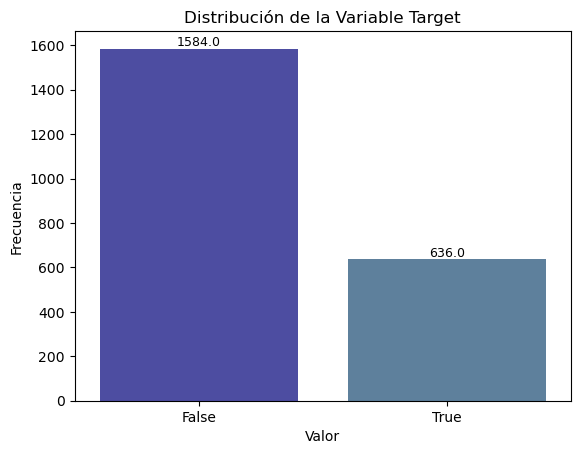

In [42]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Crear el gráfico
ax = sns.countplot(x=target, data=df_merged, palette=['#3f3faf', '#5481a6'])

# Títulos y etiquetas
plt.title('Distribución de la Variable Target', fontsize=12)
plt.xlabel('Valor', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)

#Añadir etiquetas en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=9)

# Mostrar el gráfico
plt.show()


#### Distribucion de las variables numéricas

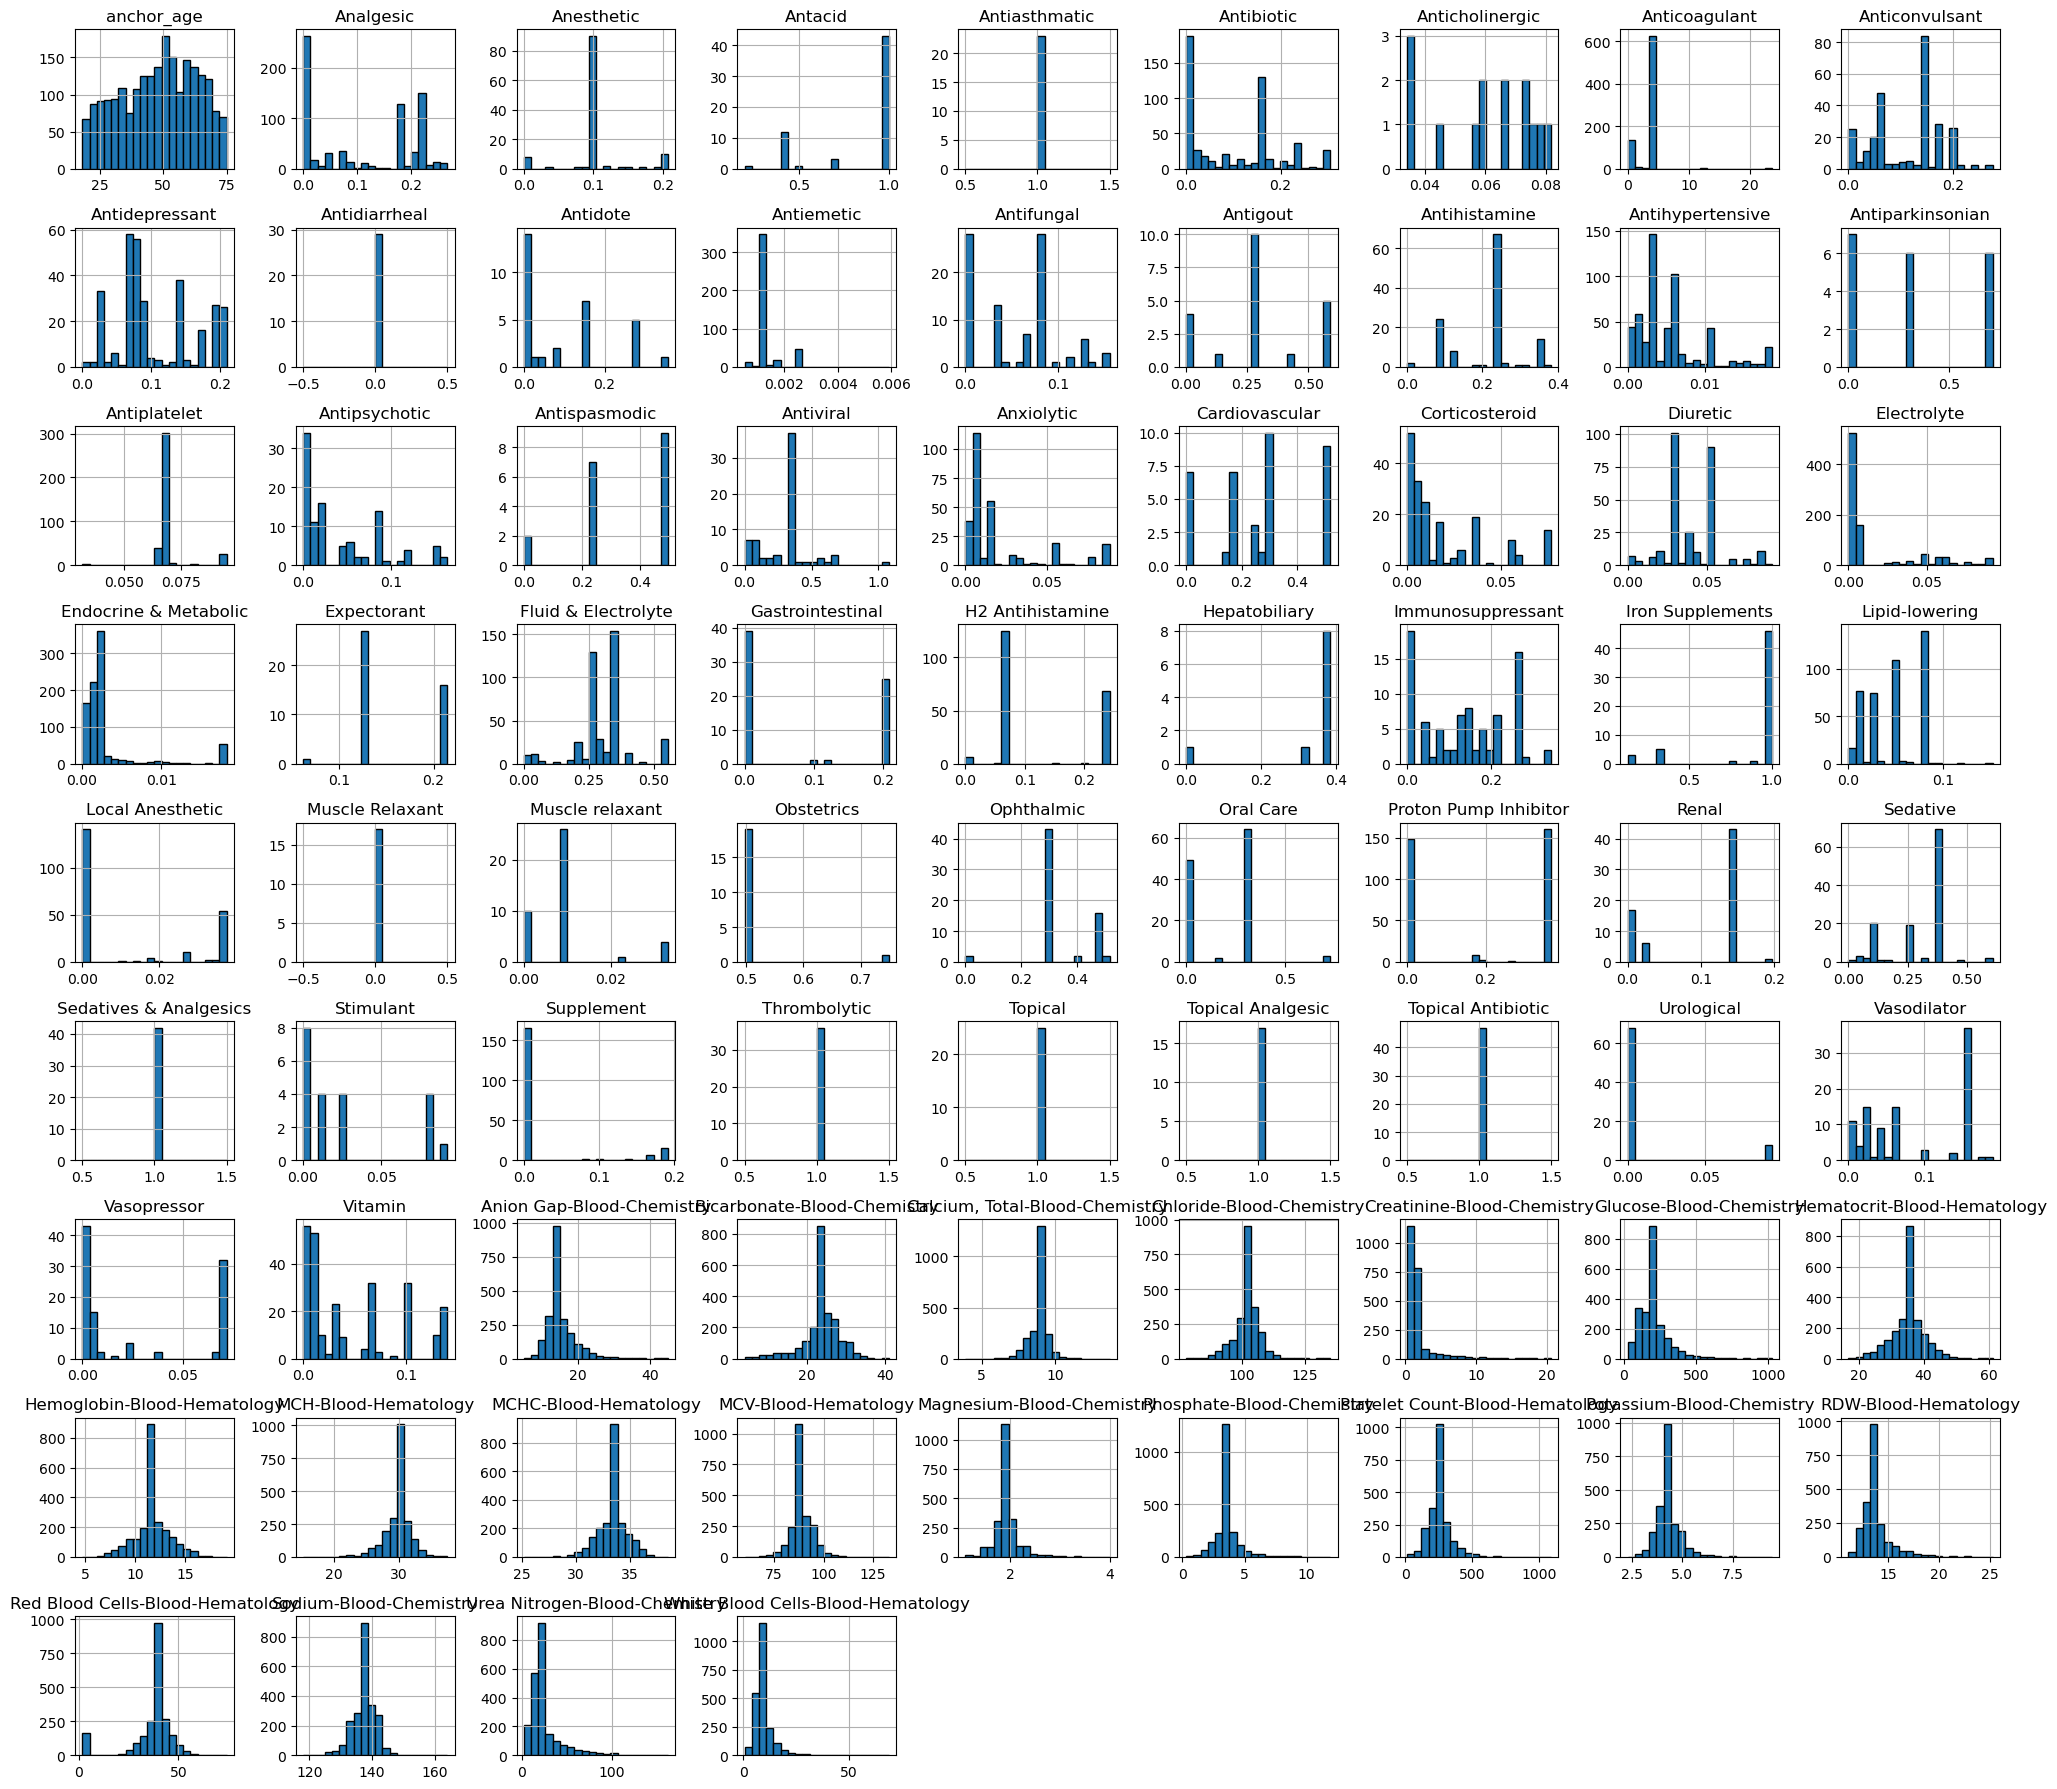

In [40]:
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas
numeric_vars = df_merged.select_dtypes(include=['float64', 'int64'])

# Crear histogramas para cada variable numérica
numeric_vars.hist(bins=20, figsize=(20, 18), grid=True, edgecolor='black')
plt.tight_layout()
plt.show()


Tras realizar un análisis exploratorio de las distribuciones de las variables numéricas en el conjunto de datos, se identificaron algunas observaciones clave que requieren una atención particular:

1. Variables de Medicación:

Se observó que varias variables relacionadas con la medicación, como 'Antiasthmatic', 'Antidiarrheal', 'Muscle Relaxant', 'Sedatives & Analgesics', 'Thrombolytic', 'Topical', 'Topical Analgesic', y 'Topical Antibiotic', presentan una distribución constante, es decir, con una varianza de 0. Esto indica que todos los pacientes que toman estas medicaciones tienen los mismos valores, lo que puede deberse a que los medicamentos son administrados a la misma dosis a todos los pacientes o a la ausencia de variabilidad en los datos. Estas variables requieren una revisión más detallada para comprender su falta de variabilidad, lo que podría ser relevante para el análisis posterior.

En general, las variables correspondientes a medicación no siguen una distribución centralizada (normal o simétrica), lo que sugiere que la mayoría de las dosis de medicación están concentradas en ciertos valores y que hay pocos pacientes con dosis extremadamente altas o bajas. Esto puede ser esperado en ciertos tratamientos médicos, donde las dosis son determinadas por protocolos estándar.

2. Variables de Pruebas de Laboratorio:

En cambio, las variables asociadas a las pruebas de laboratorio, como las concentraciones de glucosa y creatinina, hemoglobina y hematocrito, muestran distribuciones más simétricas o normales. Sin embargo, algunos de estos resultados presentan asimetría en las distribuciones. Esta asimetría puede deberse a la presencia de valores atípicos o a la influencia de factores biológicos en los resultados de los pacientes, como la presencia de comorbilidades o tratamientos médicos que afectan los resultados de laboratorio. Esta asimetría debe tenerse en cuenta al aplicar técnicas estadísticas, ya que puede ser necesario transformar o ajustar los datos para normalizarlos o hacerlos más comparables entre los pacientes.

### Pruebas de laboratorio

#### Detección de outliers

In [43]:

lab_columns=['Anion Gap-Blood-Chemistry',
       'Bicarbonate-Blood-Chemistry', 'Calcium, Total-Blood-Chemistry',
       'Chloride-Blood-Chemistry', 'Creatinine-Blood-Chemistry',
       'Glucose-Blood-Chemistry', 'Hematocrit-Blood-Hematology',
       'Hemoglobin-Blood-Hematology', 'MCH-Blood-Hematology',
       'MCHC-Blood-Hematology', 'MCV-Blood-Hematology',
       'Magnesium-Blood-Chemistry', 'Phosphate-Blood-Chemistry',
       'Platelet Count-Blood-Hematology', 'Potassium-Blood-Chemistry',
       'RDW-Blood-Hematology', 'Red Blood Cells-Blood-Hematology',
       'Sodium-Blood-Chemistry', 'Urea Nitrogen-Blood-Chemistry',
       'White Blood Cells-Blood-Hematology']
# Definir la función para detectar outliers usando el IQR
def detectar_outliers_iqr(df, columns):
    outliers = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir los límites inferior y superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificar los outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

# Llamar a la función para detectar los outliers en las columnas de laboratorio
outliers_detectados = detectar_outliers_iqr(df_merged, lab_columns)

# Mostrar los outliers encontrados en cada columna
for col, data in outliers_detectados.items():
    print(f"Outliers en {col}:")
    print(data[[col]])
    print("\n")


Outliers en Anion Gap-Blood-Chemistry:
      Anion Gap-Blood-Chemistry
1                          27.0
9                          22.0
17                         28.0
20                          8.0
25                         21.0
...                         ...
2181                       25.0
2200                       21.0
2204                       28.0
2208                       21.0
2213                        8.0

[213 rows x 1 columns]


Outliers en Bicarbonate-Blood-Chemistry:
      Bicarbonate-Blood-Chemistry
1                             5.0
2                            32.0
3                            10.0
17                           10.0
20                           32.0
...                           ...
2193                         14.0
2200                         15.0
2204                          9.0
2208                         16.0
2211                         18.0

[324 rows x 1 columns]


Outliers en Calcium, Total-Blood-Chemistry:
      Calcium, Total-Blood-Chemi

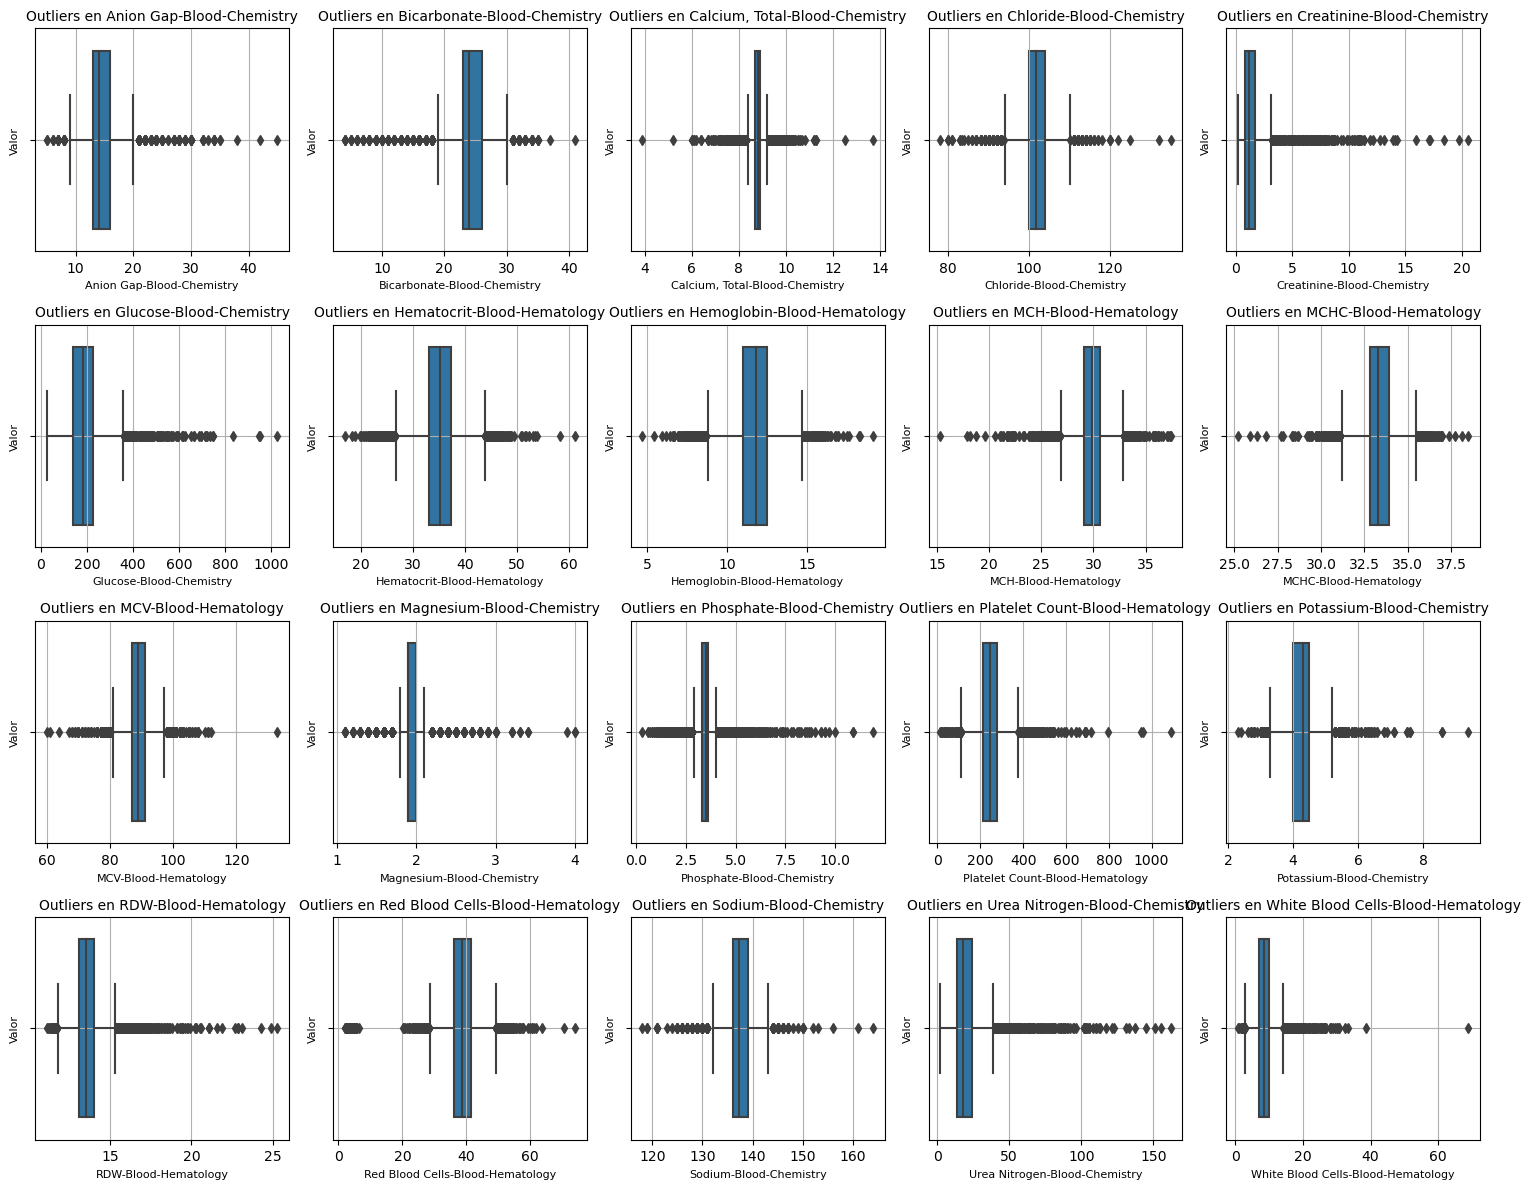

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con subgráficos
n_cols = 5  # Número de columnas en el gráfico
n_rows = (len(lab_columns) // n_cols) + (len(lab_columns) % n_cols > 0)  # Número de filas necesarias

# Crear subgráficos para los boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Convertir la matriz de subgráficos en un arreglo 1D

# Crear un boxplot para cada columna de laboratorio
for i, col in enumerate(lab_columns):
    sns.boxplot(data=df_merged, x=col, ax=axes[i])
    axes[i].set_title(f'Outliers en {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Valor', fontsize=8)
    axes[i].grid(True)

# Eliminar cualquier subgráfico vacío si el número de columnas no es múltiplo de 5
for j in range(len(lab_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


- **Presencia de outliers**:

En todas las variables, como se esperaba con la detección de outliers mediante el IQR, hay valores que están fuera de los "bigotes" de los boxplots. Estos puntos están marcados como círculos (puntos individuales fuera del rango intercuartílico), lo que indica que son outliers.

En algunas variables como Glucose-Blood-Chemistry, Potassium-Blood-Chemistry, Sodium-Blood-Chemistry, y Platelet Count-Blood-Hematology, los outliers están más concentrados hacia los valores más altos. Esto puede ser indicativo de pacientes con niveles anormales de estos elementos en la sangre, lo cual puede requerir revisión clínica.

En otras variables, como Urea Nitrogen-Blood-Chemistry, Red Blood Cells-Blood-Hematology, y Phosphate-Blood-Chemistry, los outliers parecen estar más distribuidos, lo que podría sugerir una variabilidad más natural o frecuente en esos parámetros, pero aún fuera de los rangos esperados.

- **Forma de la distribución**:

Algunas variables como Hemoglobin-Blood-Hematology y Hematocrit-Blood-Hematology tienen una distribución en la que los valores atípicos se encuentran relativamente cerca de los valores centrales. Esto sugiere que la mayoría de los pacientes tienen niveles bastante estables, pero algunas mediciones son mucho más altas que el resto.

Variables como MCV-Blood-Hematology y RDW-Blood-Hematology tienen outliers que se alejan bastante del rango central, lo que puede indicar que ciertos pacientes presentan mediciones muy alejadas de la media, lo que podría ser relevante en diagnóstico de anemia u otras condiciones hematológicas.

- **Importancia de los outliers**:

En algunos casos, como Urea Nitrogen-Blood-Chemistry o Creatinine-Blood-Chemistry, los outliers podrían estar reflejando una insuficiencia renal o daño renal, que son condiciones de alta relevancia clínica.


- **Densidad de los datos**:

En general, los boxplots muestran que para muchas variables los datos están concentrados en un rango estrecho (aunque hay outliers). Las distribuciones no son simétricas, lo que indica que algunas variables podrían estar sesgadas hacia la derecha o la izquierda.

In [101]:
niveles_anormales=['Glucose-Blood-Chemistry', 'Potassium-Blood-Chemistry', 'Sodium-Blood-Chemistry', 'Platelet Count-Blood-Hematology']

# Crear una figura con subgráficos
n_cols = 4  # Número de columnas en el gráfico
n_rows = 1
# Crear subgráficos para los boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Convertir la matriz de subgráficos en un arreglo 1D

# Crear un boxplot para cada columna de laboratorio
for i, col in enumerate(niveles_anormales):
    sns.boxplot(data=df_merged, x=col, ax=axes[i])
    axes[i].set_title(f'Outliers en {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Valor', fontsize=8)
    axes[i].grid(True)

# Eliminar cualquier subgráfico vacío si el número de columnas no es múltiplo de 5
for j in range(len(niveles_anormales), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


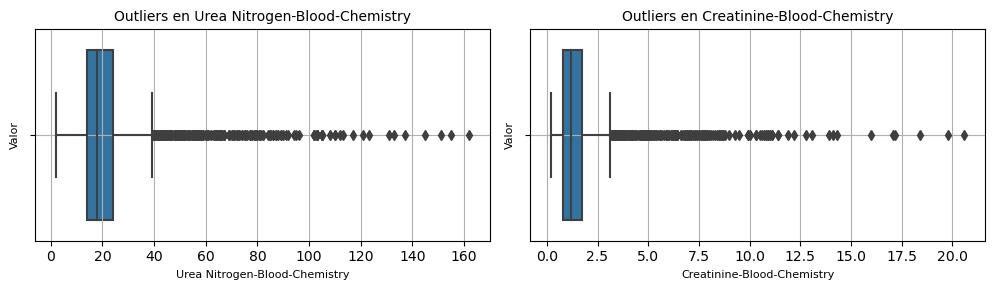

In [102]:
indicadores_IR=['Urea Nitrogen-Blood-Chemistry','Creatinine-Blood-Chemistry']
# Crear una figura con subgráficos
n_cols = 3  # Número de columnas en el gráfico
n_rows = 1
# Crear subgráficos para los boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Convertir la matriz de subgráficos en un arreglo 1D

# Crear un boxplot para cada columna de laboratorio
for i, col in enumerate(indicadores_IR):
    sns.boxplot(data=df_merged, x=col, ax=axes[i])
    axes[i].set_title(f'Outliers en {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Valor', fontsize=8)
    axes[i].grid(True)

# Eliminar cualquier subgráfico vacío si el número de columnas no es múltiplo de 5
for j in range(len(indicadores_IR), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


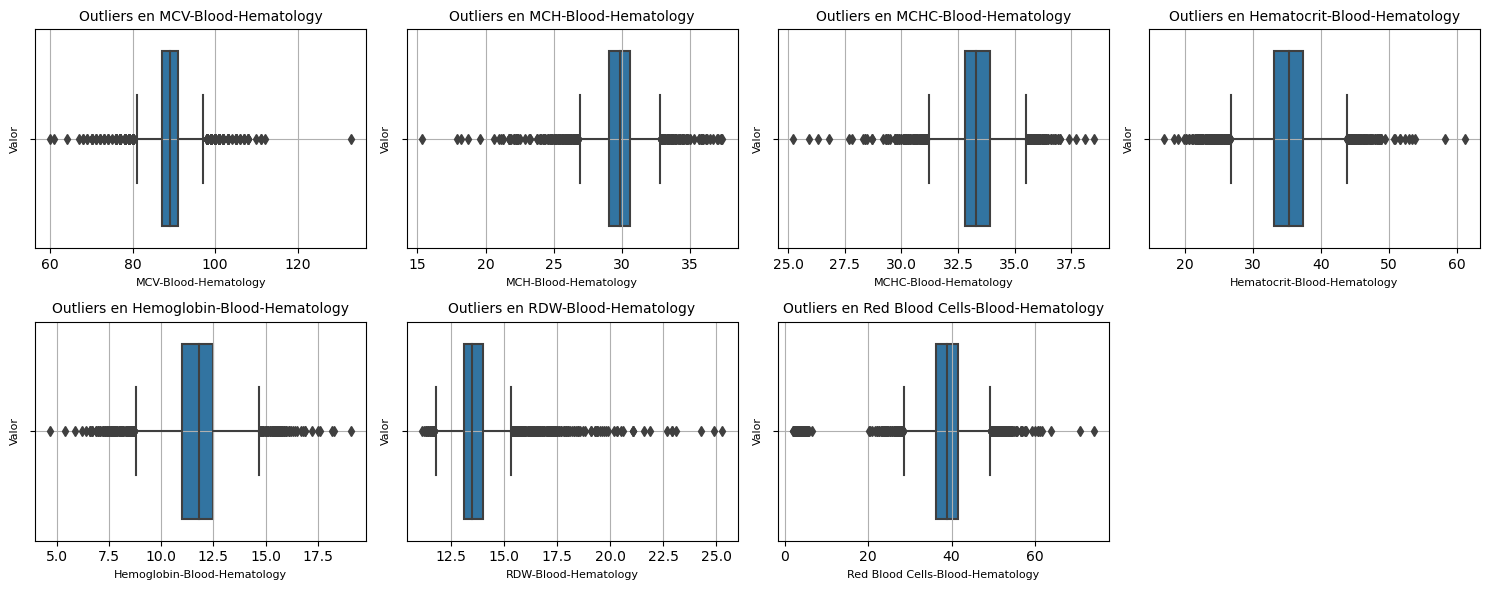

In [103]:
indicadores_anemia=['MCV-Blood-Hematology','MCH-Blood-Hematology', 'MCHC-Blood-Hematology','Hematocrit-Blood-Hematology','Hemoglobin-Blood-Hematology','RDW-Blood-Hematology', 'Red Blood Cells-Blood-Hematology']
# Crear una figura con subgráficos
n_cols = 4  # Número de columnas en el gráfico
n_rows = 2
# Crear subgráficos para los boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Convertir la matriz de subgráficos en un arreglo 1D

# Crear un boxplot para cada columna de laboratorio
for i, col in enumerate(indicadores_anemia):
    sns.boxplot(data=df_merged, x=col, ax=axes[i])
    axes[i].set_title(f'Outliers en {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Valor', fontsize=8)
    axes[i].grid(True)

# Eliminar cualquier subgráfico vacío si el número de columnas no es múltiplo de 5
for j in range(len(indicadores_anemia), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()




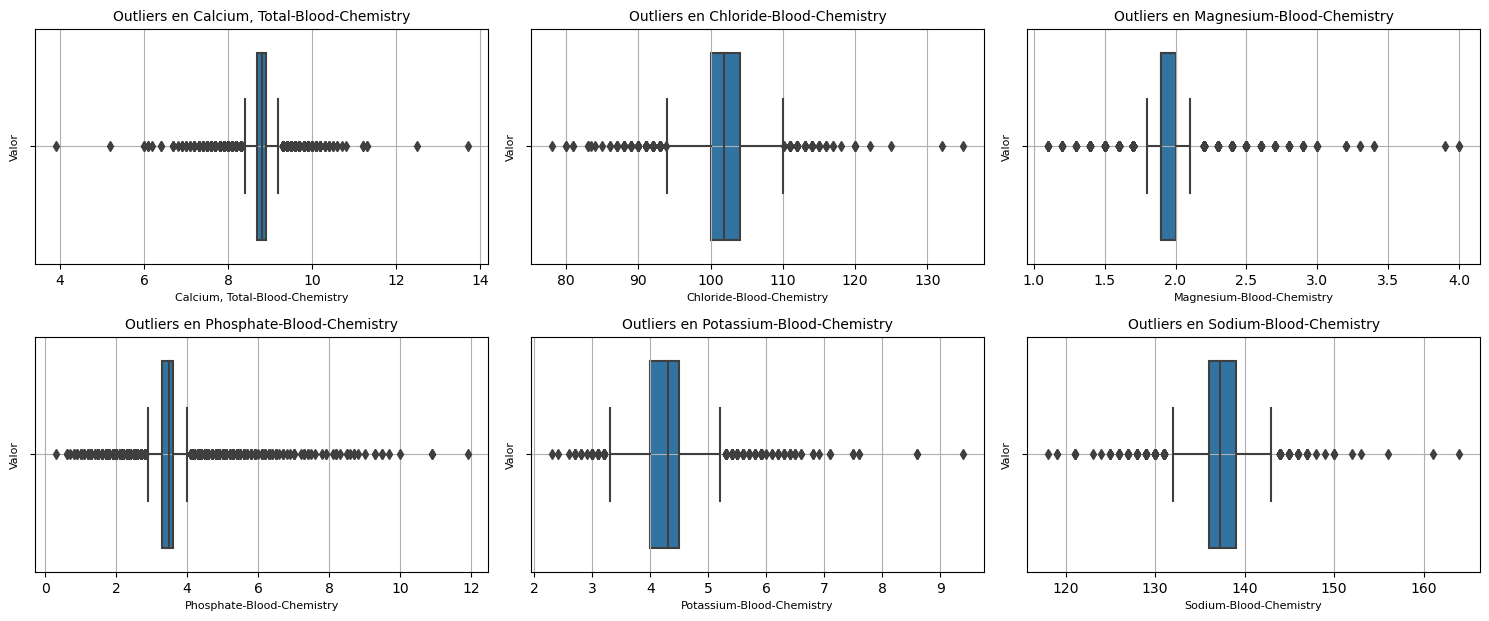

In [104]:
electrolitos=['Calcium, Total-Blood-Chemistry',
       'Chloride-Blood-Chemistry','Magnesium-Blood-Chemistry', 'Phosphate-Blood-Chemistry',
       'Potassium-Blood-Chemistry',
       'Sodium-Blood-Chemistry']
# Crear una figura con subgráficos
n_cols = 3  # Número de columnas en el gráfico
n_rows = 3
# Crear subgráficos para los boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Convertir la matriz de subgráficos en un arreglo 1D

# Crear un boxplot para cada columna de laboratorio
for i, col in enumerate(electrolitos):
    sns.boxplot(data=df_merged, x=col, ax=axes[i])
    axes[i].set_title(f'Outliers en {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Valor', fontsize=8)
    axes[i].grid(True)

# Eliminar cualquier subgráfico vacío si el número de columnas no es múltiplo de 5
for j in range(len(electrolitos), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Para tener una mejor representación de la densidad de la población, se realizaron los siguientes violin plots:

In [44]:
df_renal=df_merged[df_merged[target]==True]
df_no_renal=df_merged[df_merged[target]==False]

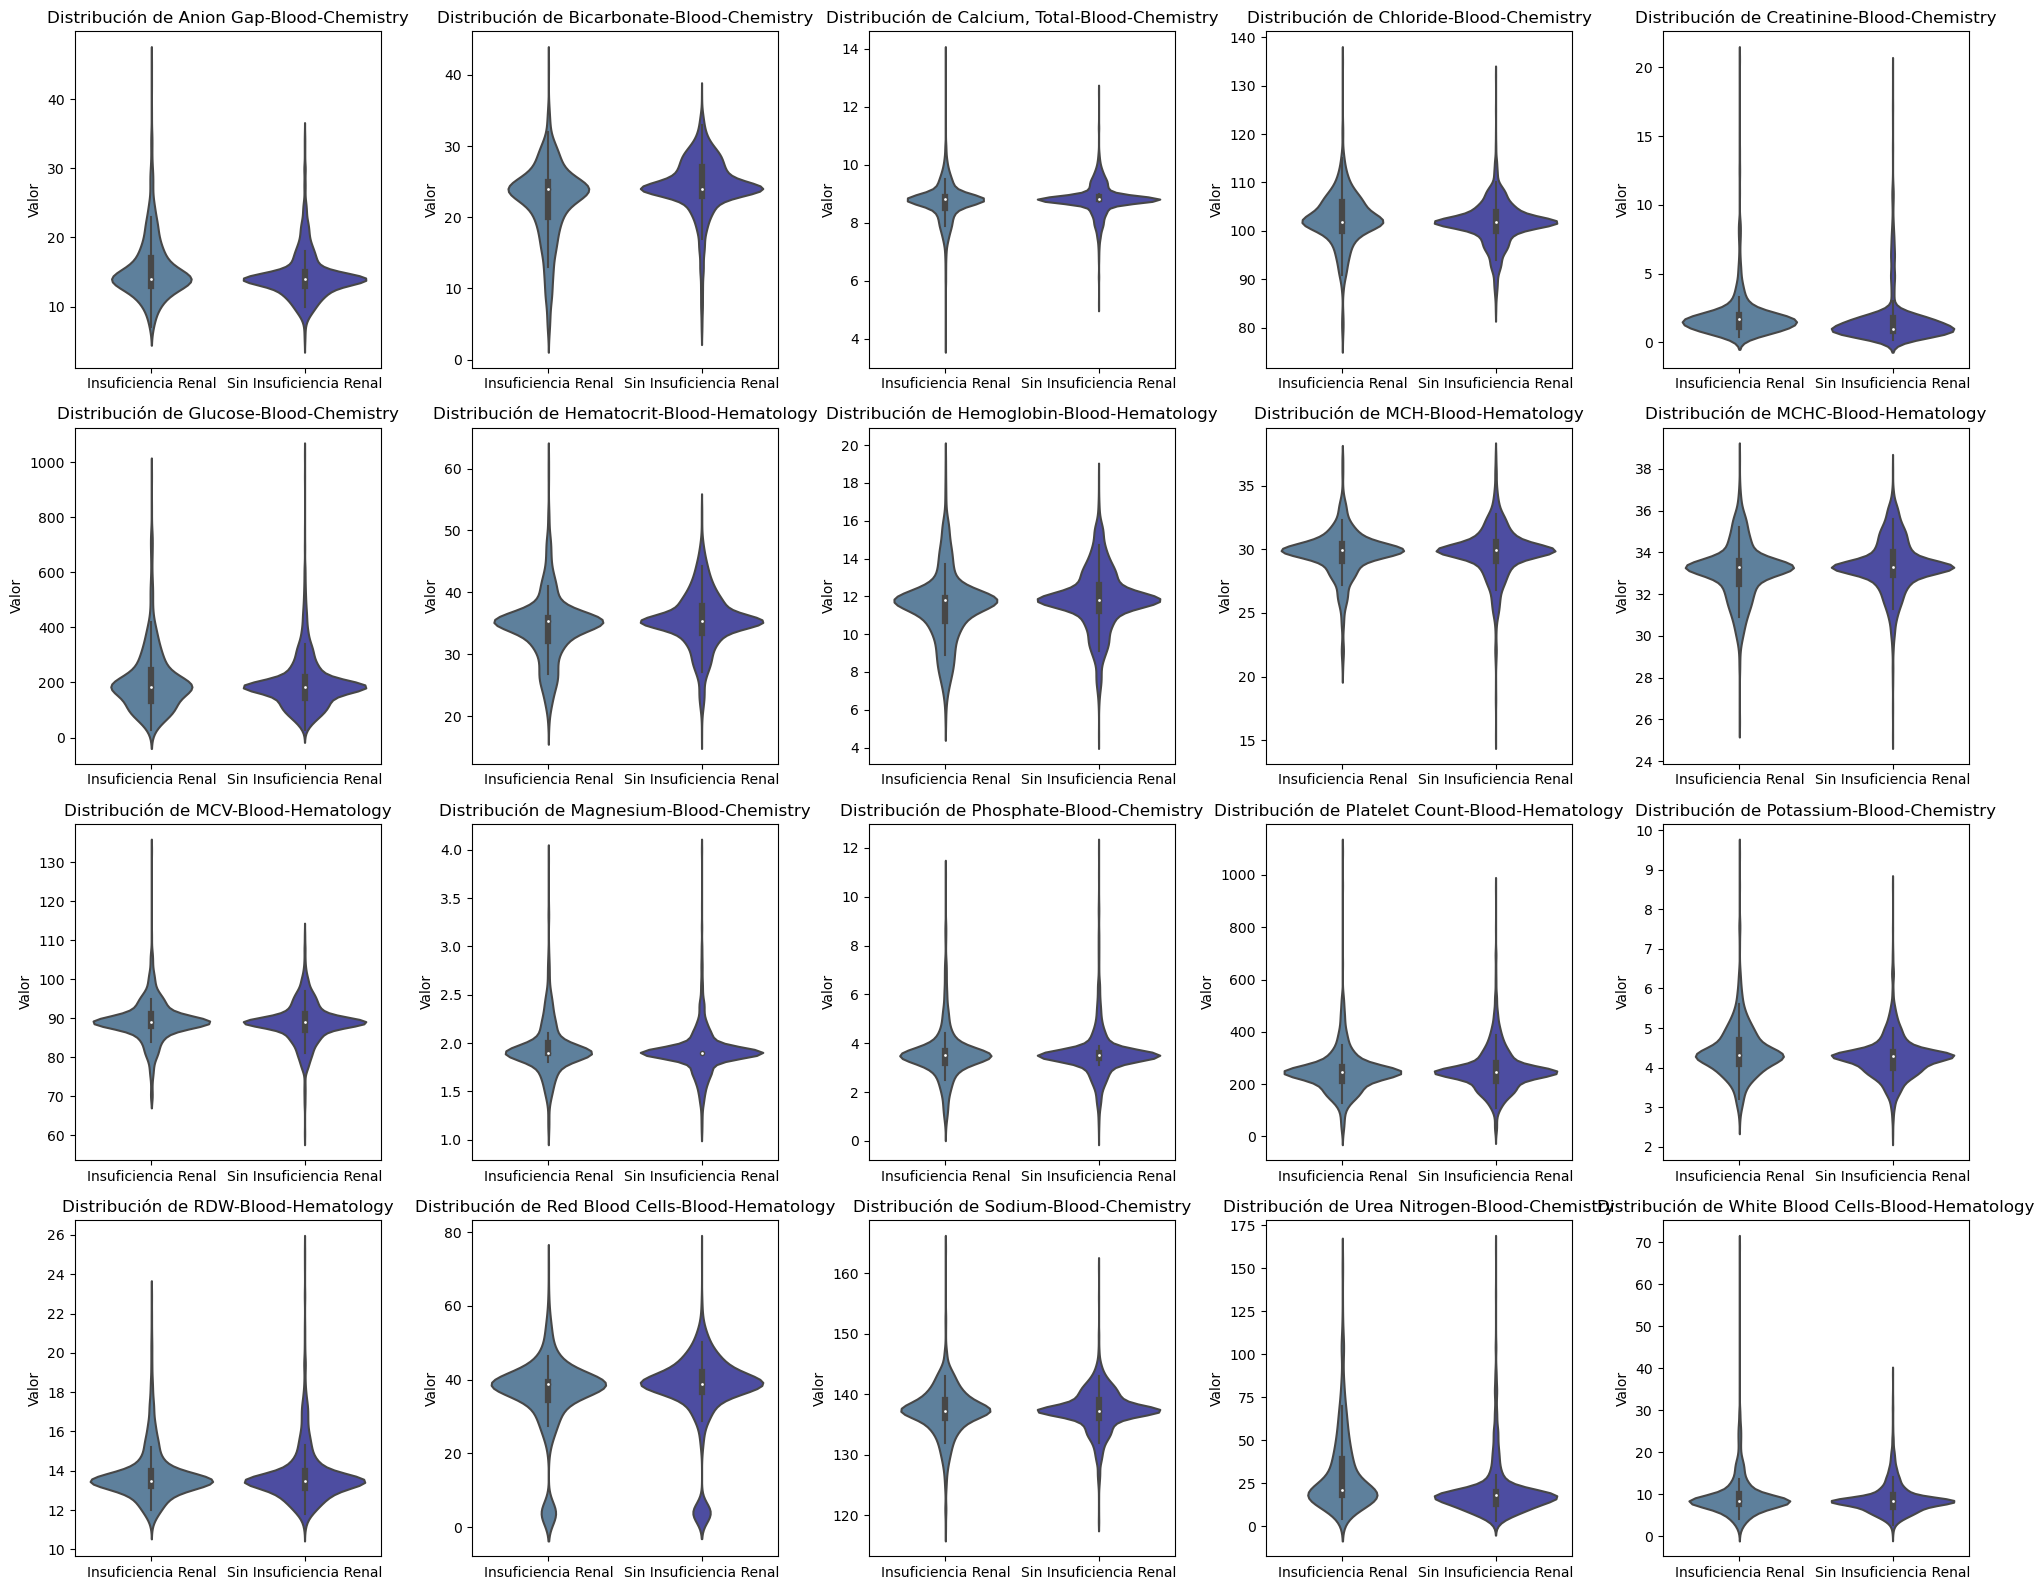

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las columnas de las pruebas de laboratorio
lab_columns = ['Anion Gap-Blood-Chemistry', 'Bicarbonate-Blood-Chemistry', 'Calcium, Total-Blood-Chemistry',
               'Chloride-Blood-Chemistry', 'Creatinine-Blood-Chemistry', 'Glucose-Blood-Chemistry', 
               'Hematocrit-Blood-Hematology', 'Hemoglobin-Blood-Hematology', 'MCH-Blood-Hematology',
               'MCHC-Blood-Hematology', 'MCV-Blood-Hematology', 'Magnesium-Blood-Chemistry', 
               'Phosphate-Blood-Chemistry', 'Platelet Count-Blood-Hematology', 'Potassium-Blood-Chemistry',
               'RDW-Blood-Hematology', 'Red Blood Cells-Blood-Hematology', 'Sodium-Blood-Chemistry',
               'Urea Nitrogen-Blood-Chemistry', 'White Blood Cells-Blood-Hematology']


# Crear la columna de grupo si no existe
df_merged['Grupo'] = df_merged[target].map({True: 'Insuficiencia Renal', False: 'Sin Insuficiencia Renal'})

# Crear subplots para visualizar los violin plots
n_cols = 5
n_rows = len(lab_columns) // n_cols + (len(lab_columns) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Crear los violin plots
for i, lab_test in enumerate(lab_columns):
    sns.violinplot(
        x='Grupo', y=lab_test, data=df_merged, ax=axes[i], inner="box",
        order=['Insuficiencia Renal', 'Sin Insuficiencia Renal'],
        palette=['#5481a6', '#3f3faf']
    )
    axes[i].set_title(f'Distribución de {lab_test}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Valor')

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar espacio y guardar figura
plt.tight_layout()
plt.savefig('violin_plot_insuficiencia_renal.png')
plt.show()


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de nombres legibles
nombres_legibles = {
    'Calcium, Total-Blood-Chemistry': 'Calcio',
    'Chloride-Blood-Chemistry': 'Cloruro',
    'Phosphate-Blood-Chemistry': 'Fosfato',
    'Potassium-Blood-Chemistry': 'Potasio',
    'Sodium-Blood-Chemistry': 'Sodio'
}

# Unidades por prueba
unidades_lab = {
    'Calcium, Total-Blood-Chemistry': 'mg/dL',
    'Chloride-Blood-Chemistry': 'mEq/L',
    'Phosphate-Blood-Chemistry': 'mg/dL',
    'Potassium-Blood-Chemistry': 'mEq/L',
    'Sodium-Blood-Chemistry': 'mEq/L'
}

# Columnas a graficar
lab_columns = list(nombres_legibles.keys())

# Asigna el grupo según la variable objetivo (asegúrate de definir `target`)
df_merged['Grupo'] = df_merged[target].map({True: 'Insuficiencia Renal', False: 'Sin Insuficiencia Renal'})

# Crear subplots
n_cols = 5
n_rows = len(lab_columns) // n_cols + (len(lab_columns) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Graficar
for i, lab_test in enumerate(lab_columns):
    ax = axes[i]
    sns.violinplot(
        x='Grupo', y=lab_test, data=df_merged, ax=ax, inner="box",
        order=['Insuficiencia Renal', 'Sin Insuficiencia Renal'],
        palette=['#5481a6', '#3f3faf']
    )

    nombre_legible = nombres_legibles.get(lab_test, lab_test)
    unidad = unidades_lab.get(lab_test, '')
    
    ax.set_title(f'Distribución de {nombre_legible}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(f'{nombre_legible} ({unidad})')

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Distribución de los principales electrolitos de pacientes DT1 con y sin IR', fontsize=16, y=1.02)

# Mostrar
plt.tight_layout()
plt.savefig('violin_plot_electrolitos_DT1_IR_sin_medianas.png', bbox_inches='tight')
plt.show()



In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de nombres legibles
nombres_legibles = {
    'Glucose-Blood-Chemistry': 'Glucosa',
    'Calcium, Total-Blood-Chemistry': 'Calcio',
    'Chloride-Blood-Chemistry': 'Cloruro',
    'Creatinine-Blood-Chemistry': 'Creatinina',
    'Phosphate-Blood-Chemistry': 'Fosfato',
    'Potassium-Blood-Chemistry': 'Potasio',
    'Sodium-Blood-Chemistry': 'Sodio'
}

# Unidades por prueba
unidades_lab = {
    'Glucose-Blood-Chemistry': 'mg/dL',
    'Calcium, Total-Blood-Chemistry': 'mg/dL',
    'Chloride-Blood-Chemistry': 'mEq/L',
    'Creatinine-Blood-Chemistry': 'mg/dL',
    'Phosphate-Blood-Chemistry': 'mg/dL',
    'Potassium-Blood-Chemistry': 'mEq/L',
    'Sodium-Blood-Chemistry': 'mEq/L'
}

# Rangos normales por prueba
rangos_lab = {
    'Glucose-Blood-Chemistry': (70.0, 100.0),
    'Calcium, Total-Blood-Chemistry': (8.4, 10.3),
    'Chloride-Blood-Chemistry': (96.0, 108.0),
    'Creatinine-Blood-Chemistry': (0.5, 1.2),
    'Phosphate-Blood-Chemistry': (2.7, 4.5),
    'Potassium-Blood-Chemistry': (3.3, 5.1),
    'Sodium-Blood-Chemistry': (133.0, 145.0)
}

# Columnas a graficar
lab_columns = list(nombres_legibles.keys())

# Asegúrate de definir el nombre correcto de tu variable binaria
# Ejemplo: target = 'renal_failure' o target = 'IR'
df_merged['Grupo'] = df_merged[target].map({True: 'Insuficiencia Renal', False: 'Sin Insuficiencia Renal'})

# Crear subplots
n_cols = 5
n_rows = len(lab_columns) // n_cols + (len(lab_columns) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generar cada gráfico
for i, lab_test in enumerate(lab_columns):
    ax = axes[i]
    
    sns.violinplot(
        x='Grupo', y=lab_test, data=df_merged, ax=ax, inner="box",
        order=['Insuficiencia Renal', 'Sin Insuficiencia Renal'],
        palette=['#5481a6', '#3f3faf']
    )

    # Títulos y ejes
    nombre_legible = nombres_legibles[lab_test]
    unidad = unidades_lab[lab_test]
    ax.set_title(f'Distribución de {nombre_legible}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(f'{nombre_legible} ({unidad})')

    # Líneas de rango normal
    rango_inf, rango_sup = rangos_lab[lab_test]
    ax.axhline(rango_inf, color='gray', linestyle='--', linewidth=1)
    ax.axhline(rango_sup, color='gray', linestyle='--', linewidth=1)
    ax.text(0.5, rango_inf, f'↓ {rango_inf}', ha='left', va='bottom', fontsize=8, color='black')
    ax.text(0.5, rango_sup, f'↑ {rango_sup}', ha='left', va='bottom', fontsize=8, color='black')

# Eliminar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Distribución de los principales electrolitos de pacientes DT1 con y sin IR', fontsize=16, y=1.02)

# Ajustes finales
plt.tight_layout()
plt.savefig('violin_plot_electrolitos_con_rangos_normales.png', bbox_inches='tight')
plt.show()


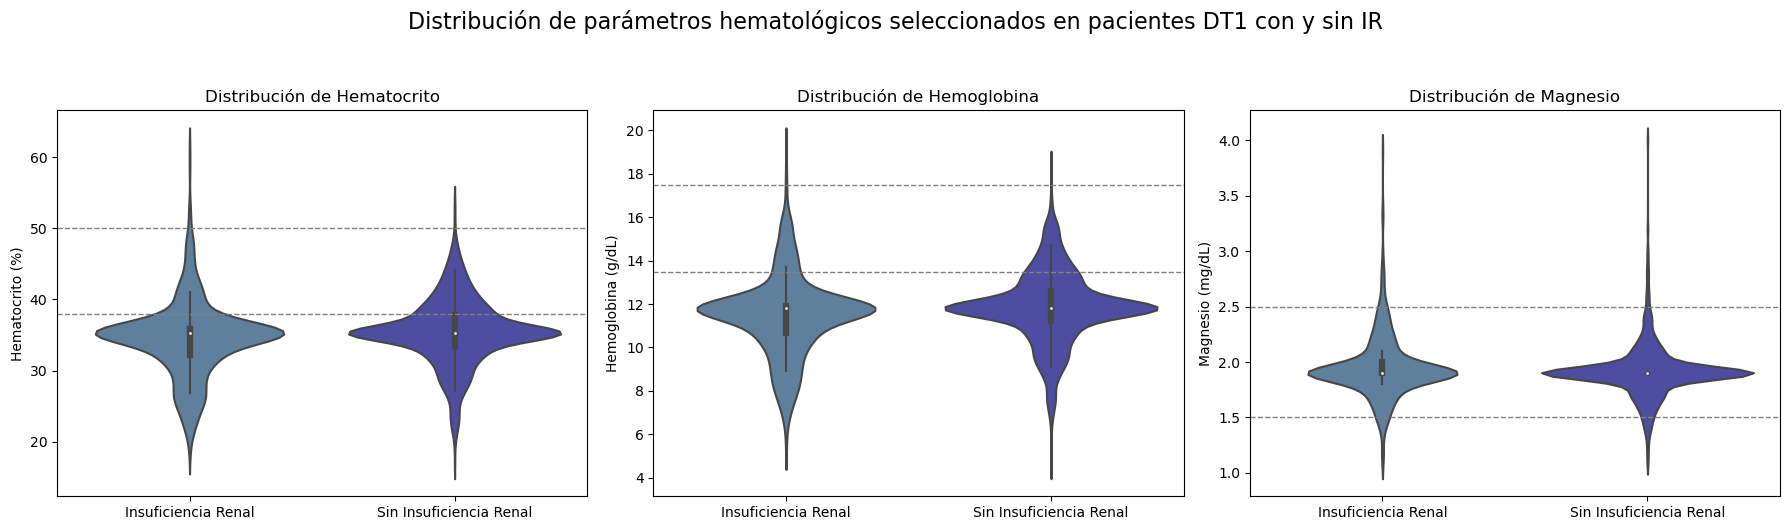

In [134]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Diccionario de nombres legibles
nombres_legibles = {
    'Hematocrit-Blood-Hematology': 'Hematocrito',
    'Hemoglobin-Blood-Hematology': 'Hemoglobina',
    'Magnesium-Blood-Chemistry': 'Magnesio'
}

# Unidades por prueba
unidades_lab = {
    'Hematocrit-Blood-Hematology': '%',
    'Hemoglobin-Blood-Hematology': 'g/dL',
    'Magnesium-Blood-Chemistry': 'mg/dL'
}

# Rangos normales por prueba
rangos_lab = {
    'Hematocrit-Blood-Hematology': (38.0, 50.0),
    'Hemoglobin-Blood-Hematology': (13.5, 17.5),
    'Magnesium-Blood-Chemistry': (1.5, 2.5)
}

# Columnas a graficar
lab_columns = list(nombres_legibles.keys())

# Asegúrate de tener esta columna bien definida
df_merged['Grupo'] = df_merged[target].map({True: 'Insuficiencia Renal', False: 'Sin Insuficiencia Renal'})

# Crear subplots
n_cols = 3
fig, axes = plt.subplots(1, n_cols, figsize=(n_cols * 6, 5))
axes = axes.flatten()

# Generar cada gráfico
for i, lab_test in enumerate(lab_columns):
    ax = axes[i]
    
    sns.violinplot(
        x='Grupo', y=lab_test, data=df_merged, ax=ax, inner="box",
        order=['Insuficiencia Renal', 'Sin Insuficiencia Renal'],
        palette=['#5481a6', '#3f3faf']
    )

    # Títulos y ejes
    nombre_legible = nombres_legibles[lab_test]
    unidad = unidades_lab[lab_test]
    ax.set_title(f'Distribución de {nombre_legible}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(f'{nombre_legible} ({unidad})')

    # Líneas de rango normal
    rango_inf, rango_sup = rangos_lab[lab_test]
    ax.axhline(rango_inf, color='gray', linestyle='--', linewidth=1)
    ax.axhline(rango_sup, color='gray', linestyle='--', linewidth=1)

# Título general
fig.suptitle('Distribución de parámetros hematológicos seleccionados en pacientes DT1 con y sin IR', fontsize=16, y=1.05)

# Ajustes finales
plt.tight_layout()
plt.savefig('violin_plot_hematologicos_con_rangos.png', bbox_inches='tight')
plt.show()


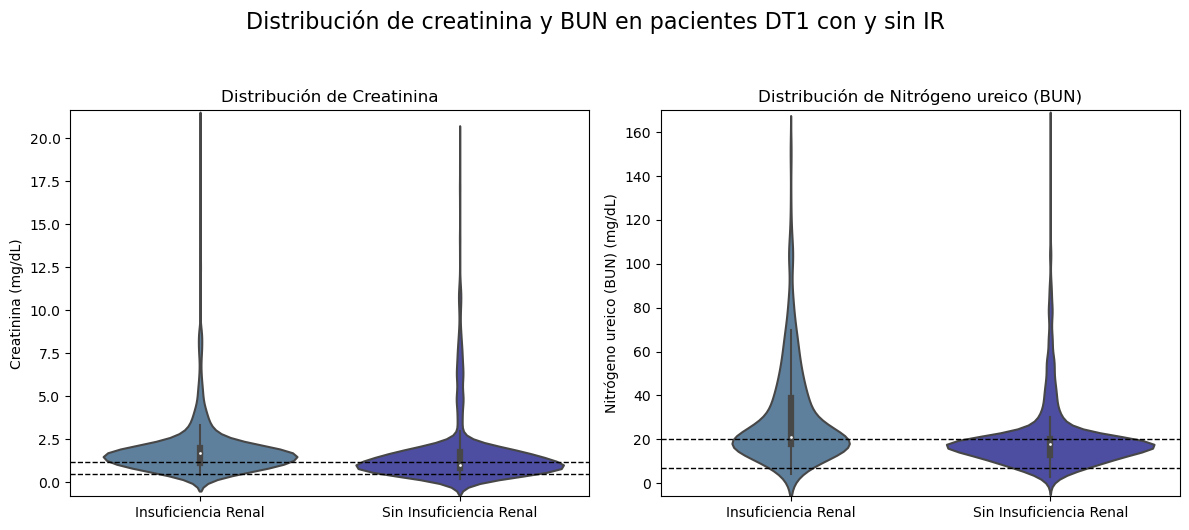

In [163]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Diccionario de nombres legibles
nombres_legibles = {
    'Creatinine-Blood-Chemistry': 'Creatinina',
    'Urea Nitrogen-Blood-Chemistry': 'Nitrógeno ureico (BUN)'
}

# Unidades por prueba
unidades_lab = {
    'Creatinine-Blood-Chemistry': 'mg/dL',
    'Urea Nitrogen-Blood-Chemistry': 'mg/dL'
}

# Rangos normales por prueba
rangos_lab = {
    'Creatinine-Blood-Chemistry': (0.5, 1.2),
    'Urea Nitrogen-Blood-Chemistry': (7.0, 20.0)
}

lab_columns = list(nombres_legibles.keys())
df_merged['Grupo'] = df_merged[target].map({True: 'Insuficiencia Renal', False: 'Sin Insuficiencia Renal'})

# Crear subplots
n_cols = 2
fig, axes = plt.subplots(1, n_cols, figsize=(n_cols * 6, 5))
axes = axes.flatten()

for i, lab_test in enumerate(lab_columns):
    ax = axes[i]
    
    sns.violinplot(
        x='Grupo', y=lab_test, data=df_merged, ax=ax, inner="box",
        order=['Insuficiencia Renal', 'Sin Insuficiencia Renal'],
        palette=['#5481a6', '#3f3faf']
    )

    nombre_legible = nombres_legibles[lab_test]
    unidad = unidades_lab[lab_test]
    ax.set_title(f'Distribución de {nombre_legible}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(f'{nombre_legible} ({unidad})')

    # Líneas de rango normal
    rango_inf, rango_sup = rangos_lab[lab_test]
    ax.axhline(rango_inf, color='black', linestyle='--', linewidth=1)
    ax.axhline(rango_sup, color='black', linestyle='--', linewidth=1)

    # Ajustar los límites del eje Y para asegurar que se ven los rangos
    min_val = df_merged[lab_test].min()
    max_val = df_merged[lab_test].max()
    margen = (max_val - min_val) * 0.05
    ax.set_ylim(min(min_val, rango_inf) - margen, max(max_val, rango_sup) + margen)

# Título general
fig.suptitle('Distribución de creatinina y BUN en pacientes DT1 con y sin IR', fontsize=16, y=1.05)

plt.tight_layout()
plt.savefig('violin_plot_creatinina_bun_con_rangos.png', bbox_inches='tight')
plt.show()


### Medicación

In [46]:
med_columns=list(df_med.columns)
med_columns.remove('patient_id')


#### 1) Pacientes que toman algún tipo de medicación vs los que no toman ninguna


In [47]:
# Convertir 'patient_id' de df_med a lista
med_pat_list = df_med['patient_id'].unique()

# Asegurarnos de que ambos estén en el mismo tipo de datos (como strings)
patient_ids_in_df = df_merged['patient_id'].unique().astype(str).tolist()
med_pat_list = med_pat_list.astype(str)

# Identificar los pacientes en df que están en la lista med_pat_list
pacientes_en_dataset = [patient for patient in med_pat_list if patient in patient_ids_in_df]

# Pacientes de la lista que no están en el dataset
pacientes_no_en_dataset = [patient for patient in med_pat_list if patient not in patient_ids_in_df]

# Mostrar el número de pacientes que no están en el dataset
print(f"Pacientes en la lista que no están en el dataset final: {len(pacientes_no_en_dataset)}")
print(f"Pacientes en la lista que están en el dataset final: {len(pacientes_en_dataset)}")

Pacientes en la lista que no están en el dataset final: 0
Pacientes en la lista que están en el dataset final: 995


#### 2) El medicamento más común entre los pacientes que toman medicación:


In [48]:
# Crear la nueva columna 'toma medicacion' en df_merged
df_merged['toma medicacion'] = df_merged['patient_id'].astype(str).isin(pacientes_en_dataset)
med_pats=df_merged[df_merged['toma medicacion']==True]
no_med_pats=df_merged[df_merged['toma medicacion']==False]

In [49]:
med_pats.head()

patient_id           admittime gender  anchor_age        dod  \
1   1001088820162667 2174-01-09 22:19:00      M          43        NaT   
6   1003796723457633 2144-03-29 19:22:00      F          55        NaT   
7   1005300523461227 2159-09-09 16:22:00      M          64        NaT   
9   1006346027699140 2175-01-05 17:06:00      M          51        NaT   
10  1007592526160109 2131-01-06 12:23:00      F          48 2133-11-17   

   deathtime  Cardiología  Cirugía / Procedimientos Médicos  \
1        NaT        False                             False   
6        NaT        False                             False   
7        NaT        False                             False   
9        NaT        False                             False   
10       NaT        False                             False   

    Enfermedades Infecciosas  Factores Sociales / Exposición / Historial  ...  \
1                      False                                       False  ...   
6                      False                                       False  ...   
7                      False                                        True  ...   
9                       True                                       False  ...   
10                     False                                       False  ...   

    Phosphate-Blood-Chemistry  Platelet Count-Blood-Hematology  \
1                         1.0                            147.0   
6                         2.5                            126.0   
7                         3.3                            255.0   
9                         2.9                            232.0   
10                        3.5                            256.0   

    Potassium-Blood-Chemistry  RDW-Blood-Hematology  \
1                         4.6                  12.6   
6                         4.0                  15.4   
7                         4.8                  14.0   
9                         4.1                  13.0   
10                        4.9                  15.5   

    Red Blood Cells-Blood-Hematology  Sodium-Blood-Chemistry  \
1                                4.4                   131.0   
6                               42.5                   140.0   
7                               38.5                   135.0   
9                               42.6                   136.0   
10                              47.1                   140.0   

    Urea Nitrogen-Blood-Chemistry  White Blood Cells-Blood-Hematology  \
1                            71.0                                26.3   
6                            18.0                                 9.4   
7                            14.0                                 6.3   
9                            11.0                                 9.5   
10                           29.0                                 9.8   

                      Grupo  toma medicacion  
1       Insuficiencia Renal             True  
6   Sin Insuficiencia Renal             True  
7       Insuficiencia Renal             True  
9   Sin Insuficiencia Renal             True  
10  Sin Insuficiencia Renal             True  

[5 rows x 105 columns]

In [50]:
# Filtrar los pacientes que toman medicación (no nulos ni ceros)
df_medication_taken = med_pats[med_pats[med_columns].gt(0).any(axis=1)]

# Contar cuántos pacientes toman cada medicamento (sumamos 1 por cada paciente único)
medication_counts = (df_medication_taken[med_columns] > 0).sum(axis=0).sort_values(ascending=False)

# Obtener el medicamento más común
most_common_medication = medication_counts.idxmax()
print(f"El medicamento más común es: {most_common_medication}")
print(f"Con {medication_counts.max()} pacientes tomando este medicamento")

# Mostrar los 20 medicamentos más comunes
top_20_medications = medication_counts.head(20)
print("Los 20 medicamentos más comunes son:")
print(top_20_medications)



El medicamento más común es: Antagonist
Con 994 pacientes tomando este medicamento
Los 20 medicamentos más comunes son:
Antagonist                   994
Antiseptic                   993
Opioid Agonist-Antagonist    993
Laxative                     993
Antitussive                  992
Radiology                    990
Smoking cessation            989
Antiflatulent                979
Vaccine                      978
Respiratory                  976
Electrolyte                  923
Endocrine & Metabolic        878
Anticoagulant                764
Analgesic                    733
Antihypertensive             529
Antibiotic                   519
Antiemetic                   438
Fluid & Electrolyte          427
Lipid-lowering               415
Antiplatelet                 381
dtype: int64


### 3- Análisis de relaciones

#### Medicación pacientes diabéticos con IR vs sin IR

Hipótesis: los pacientes DT1_IR toman mas medicacion para regualr el metabolismo, los fallos renales y las complicaciones cardiacas que los que no tiene IR.

In [51]:
df_renal=df_merged[df_merged[target]==True]
df_no_renal=df_merged[df_merged[target]==False]

In [52]:
# Contamos cuántos pacientes con insuficiencia renal toman y no toman medicación
renal_medication = df_renal[df_renal['toma medicacion'] == True].shape[0]
renal_no_medication = df_renal[df_renal['toma medicacion'] == False].shape[0]

# Contamos cuántos pacientes diabéticos tipo 1 (sin considerar insuficiencia renal) toman y no toman medicación
total_medication = df_merged[df_merged['toma medicacion'] == True].shape[0]
total_no_medication = df_merged[df_merged['toma medicacion'] == False].shape[0]

# Crear la tabla de comparación
medication_table = pd.DataFrame({
    'Medicación': [renal_medication, total_medication - renal_medication],
    'Sin Medicación': [renal_no_medication, total_no_medication - renal_no_medication]
}, index=['Pacientes DT1_IR', 'Pacientes DT1'])


# Ver también las primeras filas si prefieres verlo en el código
medication_table


Medicación  Sin Medicación
Pacientes DT1_IR         351             285
Pacientes DT1            644             940

In [53]:
# Filtrar los pacientes que toman medicación en ambos grupos
df_renal_med = df_renal[df_renal['toma medicacion'] == True]
df_no_renal_med = df_no_renal[df_no_renal['toma medicacion'] == True]

# Contar cuántos pacientes toman cada medicamento en los dos grupos (con IR y sin IR)
medication_counts_renal = (df_renal_med[med_columns] > 0).sum(axis=0)
medication_counts_no_renal = (df_no_renal_med[med_columns] > 0).sum(axis=0)

# Crear una tabla de frecuencias con la cantidad de pacientes para cada medicamento
medication_comparison = pd.DataFrame({
    'Con IR': medication_counts_renal,
    'Sin IR': medication_counts_no_renal
}).fillna(0)

# Calcular las frecuencias normalizadas (para tener en cuenta el número diferente de pacientes en ambos grupos)
total_renal = len(df_renal_med)
total_no_renal = len(df_no_renal_med)

medication_comparison['Frecuencia con IR'] = 100 * medication_comparison['Con IR'] / total_renal
medication_comparison['Frecuencia sin IR'] = 100 * medication_comparison['Sin IR'] / total_no_renal

# Ordenar la tabla según la frecuencia en pacientes con insuficiencia renal
medication_comparison_sorted = medication_comparison.sort_values(by='Frecuencia con IR', ascending=False).head(15)

# Resaltar filas donde la frecuencia con IR es mayor que sin IR
styled_table = medication_comparison_sorted.style.apply(
    lambda x: ['background-color: #5481a6' if x['Frecuencia con IR'] > x['Frecuencia sin IR'] else '' for i in range(len(x))], axis=1
)

styled_table



In [54]:
# Filtrar los pacientes que toman medicación en ambos grupos
df_renal_med = df_renal[df_renal['toma medicacion'] == True]
df_no_renal_med = df_no_renal[df_no_renal['toma medicacion'] == True]

# Contar cuántos pacientes toman cada medicamento en los dos grupos (con IR y sin IR)
medication_counts_renal = (df_renal_med[med_columns] > 0).sum(axis=0)
medication_counts_no_renal = (df_no_renal_med[med_columns] > 0).sum(axis=0)

# Crear una tabla de frecuencias con la cantidad de pacientes para cada medicamento
medication_comparison = pd.DataFrame({
    'Con IR': medication_counts_renal,
    'Sin IR': medication_counts_no_renal
}).fillna(0)

# Calcular las frecuencias normalizadas (para tener en cuenta el número diferente de pacientes en ambos grupos)
total_renal = len(df_renal_med)
total_no_renal = len(df_no_renal_med)

medication_comparison['Frecuencia con IR'] = 100 * medication_comparison['Con IR'] / total_renal
medication_comparison['Frecuencia sin IR'] = 100 * medication_comparison['Sin IR'] / total_no_renal

# Ordenar la tabla según la frecuencia en pacientes con insuficiencia renal
medication_comparison_sorted = medication_comparison.sort_values(by='Frecuencia con IR', ascending=False)

# Resaltar filas donde la frecuencia con IR es mayor que sin IR
styled_table = medication_comparison_sorted.style.apply(
    lambda x: ['background-color: #5481a6' if x['Frecuencia con IR'] > x['Frecuencia sin IR'] else '' for i in range(len(x))], axis=1
)

styled_table


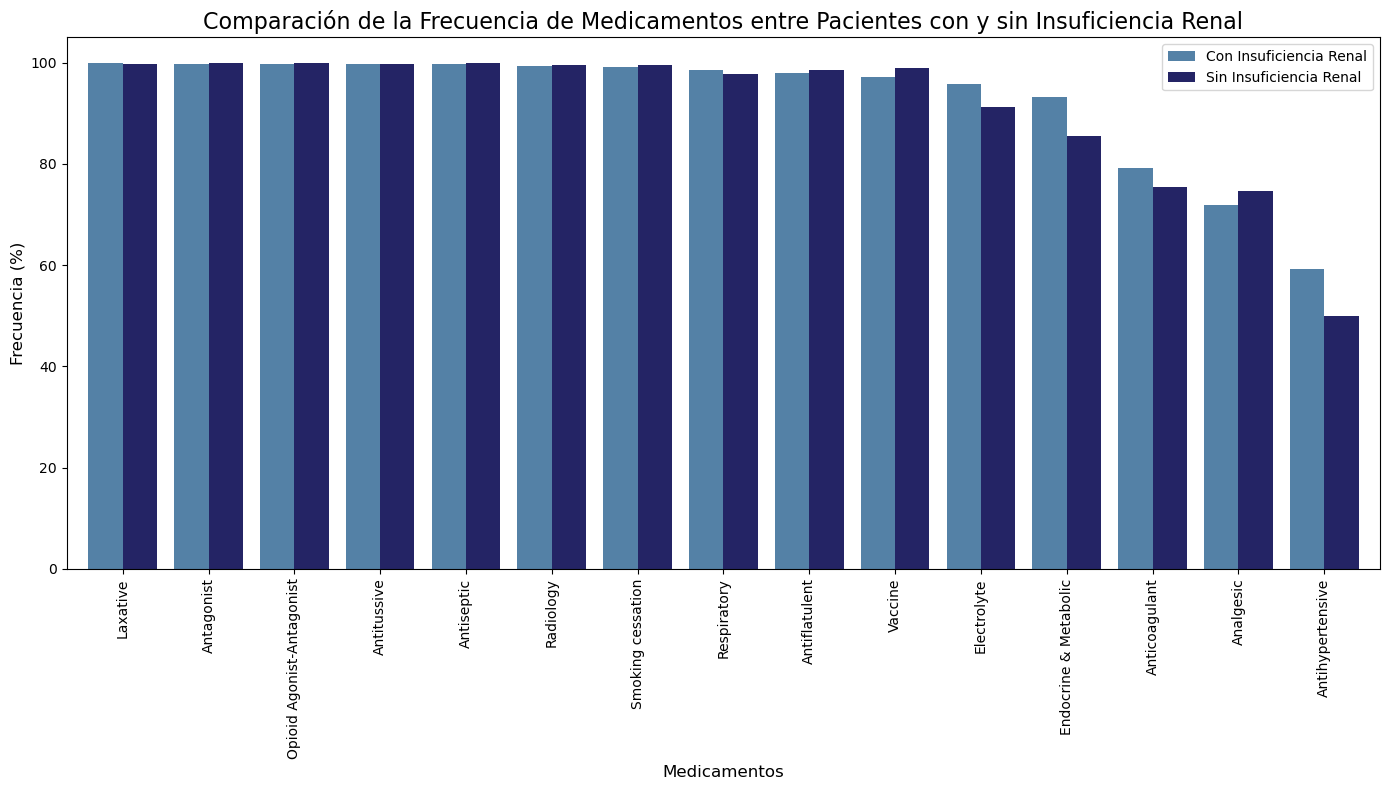

In [64]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar las frecuencias de medicamentos
plt.figure(figsize=(14, 8))

# Crear las barras para la frecuencia con IR y sin IR
medication_comparison_sorted[['Frecuencia con IR', 'Frecuencia sin IR']].plot(kind='bar', stacked=False, width=0.8, ax=plt.gca(), color=['#5481a6','#3f3faf'])

# Etiquetas y título
plt.title('Comparación de la Frecuencia de Medicamentos entre Pacientes con y sin Insuficiencia Renal', fontsize=16)
plt.xlabel('Medicamentos', fontsize=12)
plt.ylabel('Frecuencia (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(['Con Insuficiencia Renal', 'Sin Insuficiencia Renal'], loc='upper right')

# Ajustar el gráfico
plt.tight_layout()
plt.savefig('medicamentos_mayor_frecuencia_IR_.png')

# Mostrar el gráfico
plt.show()


In [55]:
medication_comparison_sorted['Diferencia']=medication_comparison['Frecuencia con IR']-medication_comparison['Frecuencia sin IR']
medication_IR_mayor_noIR=medication_comparison_sorted[medication_comparison_sorted['Diferencia']>0]
medication_IR_mayor_noIR.sort_values(by='Frecuencia con IR', ascending=False)


Con IR  Sin IR  Frecuencia con IR  Frecuencia sin IR  \
Laxative                   351     642         100.000000          99.689441   
Antitussive                350     642          99.715100          99.689441   
Respiratory                346     630          98.575499          97.826087   
Electrolyte                336     587          95.726496          91.149068   
Endocrine & Metabolic      327     551          93.162393          85.559006   
Anticoagulant              278     486          79.202279          75.465839   
Antihypertensive           208     321          59.259259          49.844720   
Antibiotic                 194     325          55.270655          50.465839   
Fluid & Electrolyte        176     251          50.142450          38.975155   
Lipid-lowering             164     251          46.723647          38.975155   
Antiemetic                 163     275          46.438746          42.701863   
Antiplatelet               155     226          44.159544          35.093168   
Diuretic                   143     137          40.740741          21.273292   
Vitamin                    104     139          29.629630          21.583851   
Anticonvulsant              98     171          27.920228          26.552795   
Corticosteroid              74      87          21.082621          13.509317   
H2 Antihistamine            71     125          20.227920          19.409938   
Proton Pump Inhibitor       64     107          18.233618          16.614907   
Sedative                    61      59          17.378917           9.161491   
Vasopressor                 57      44          16.239316           6.832298   
Anesthetic                  57      52          16.239316           8.074534   
Vasodilator                 49      43          13.960114           6.677019   
Oral Care                   43      26          12.250712           4.037267   
Local Anesthetic            34      42           9.686610           6.521739   
Ophthalmic                  33      30           9.401709           4.658385   
Immunosuppressant           30      52           8.547009           8.074534   
Antifungal                  28      35           7.977208           5.434783   
Antacid                     27      33           7.692308           5.124224   
Expectorant                 27      17           7.692308           2.639752   
Iron Supplements            24      32           6.837607           4.968944   
Antiviral                   24      43           6.837607           6.677019   
Renal                       23      27           6.552707           4.192547   
Sedatives & Analgesics      21      21           5.982906           3.260870   
Cardiovascular              18      18           5.128205           2.795031   
Thrombolytic                18      18           5.128205           2.795031   
Topical Antibiotic          18      29           5.128205           4.503106   
Antigout                    12       9           3.418803           1.397516   
Antidote                    11      16           3.133903           2.484472   
Muscle relaxant             11      20           3.133903           3.105590   
Supplement                  11      14           3.133903           2.173913   
Topical                     11      14           3.133903           2.173913   
Gastrointestinal            11      16           3.133903           2.484472   
Anticholinergic              9       5           2.564103           0.776398   
Antispasmodic                8       9           2.279202           1.397516   
Stimulant                    5       8           1.424501           1.242236   

                        Diferencia  
Laxative                  0.310559  
Antitussive               0.025659  
Respiratory               0.749412  
Electrolyte               4.577427  
Endocrine & Metabolic     7.603387  
Anticoagulant             3.736441  
Antihypertensive          9.414539  
Antibiotic                4.804817  
Fluid & El

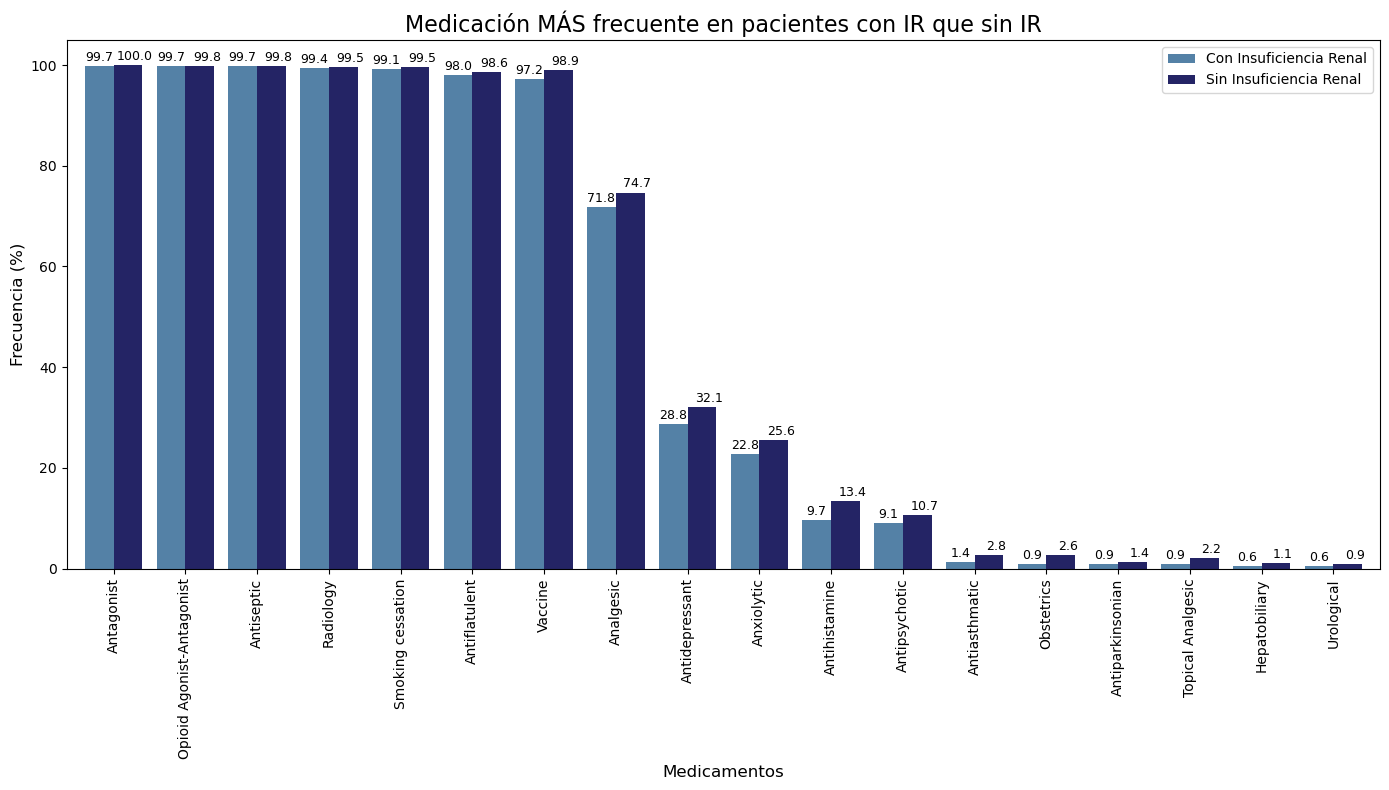

In [121]:
import matplotlib.pyplot as plt

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(14, 8))

# Colores personalizados
colors = ['#5481a6', '#242465']

# Dibujar las barras
bars = medication_IR_mayor_noIR[['Frecuencia con IR', 'Frecuencia sin IR']].plot(
    kind='bar',
    stacked=False,
    width=0.8,
    ax=ax,
    color=colors
)

# Añadir etiquetas de datos
for i, (idx, row) in enumerate(medication_IR_mayor_noIR.iterrows()):
    ax.text(i - 0.2, row['Frecuencia con IR'] + 1, f"{row['Frecuencia con IR']:.1f}", color='black', ha='center', fontsize=9)
    ax.text(i + 0.3, row['Frecuencia sin IR'] + 1, f"{row['Frecuencia sin IR']:.1f}", color='black', ha='center', fontsize=9)

# Etiquetas y título
ax.set_title('Medicación MÁS frecuente en pacientes con IR que sin IR', fontsize=16)
ax.set_xlabel('Medicamentos', fontsize=12)
ax.set_ylabel('Frecuencia (%)', fontsize=12)
ax.set_xticks(range(len(medication_IR_mayor_noIR)))
ax.set_xticklabels(medication_IR_mayor_noIR.index, rotation=90, fontsize=10)
ax.legend(['Con Insuficiencia Renal', 'Sin Insuficiencia Renal'], loc='upper right')

# Ajustar el diseño
plt.tight_layout()
plt.savefig('medicamentos_mayor_frecuencia_IR_.png')

# Mostrar el gráfico
plt.show()


In [79]:
medication_comparison_sorted['Diferencia']=medication_comparison['Frecuencia con IR']-medication_comparison['Frecuencia sin IR']
medication_IR_menor_noIR=medication_comparison_sorted[medication_comparison_sorted['Diferencia']<0]
medication_IR_menor_noIR.sort_values(by='Frecuencia con IR', ascending=False)

Con IR  Sin IR  Frecuencia con IR  \
Antagonist                    350     644          99.715100   
Opioid Agonist-Antagonist     350     643          99.715100   
Antiseptic                    350     643          99.715100   
Radiology                     349     641          99.430199   
Smoking cessation             348     641          99.145299   
Antiflatulent                 344     635          98.005698   
Vaccine                       341     637          97.150997   
Analgesic                     252     481          71.794872   
Antidepressant                101     207          28.774929   
Anxiolytic                     80     165          22.792023   
Antihistamine                  34      86           9.686610   
Antipsychotic                  32      69           9.116809   
Antiasthmatic                   5      18           1.424501   
Obstetrics                      3      17           0.854701   
Antiparkinsonian                3       9           0.854701   
Topical Analgesic               3      14           0.854701   
Hepatobiliary                   2       7           0.569801   
Urological                      2       6           0.569801   

                           Frecuencia sin IR  Diferencia  
Antagonist                        100.000000   -0.284900  
Opioid Agonist-Antagonist          99.844720   -0.129621  
Antiseptic                         99.844720   -0.129621  
Radiology                          99.534161   -0.103962  
Smoking cessation                  99.534161   -0.388862  
Antiflatulent                      98.602484   -0.596786  
Vaccine                            98.913043   -1.762046  
Analgesic                          74.689441   -2.894569  
Antidepressant                     32.142857   -3.367928  
Anxiolytic                         25.621118   -2.829095  
Antihistamine                      13.354037   -3.667428  
Antipsychotic                      10.714286   -1.597477  
Antiasthmatic                       2.795031   -1.370530  
Obstetrics                          2.639752   -1.785051  
Antiparkinsonian                    1.397516   -0.542815  
Topical Analgesic                   2.173913   -1.319212  
Hepatobiliary                       1.086957   -0.517156  
Urological                          0.931677   -0.361876

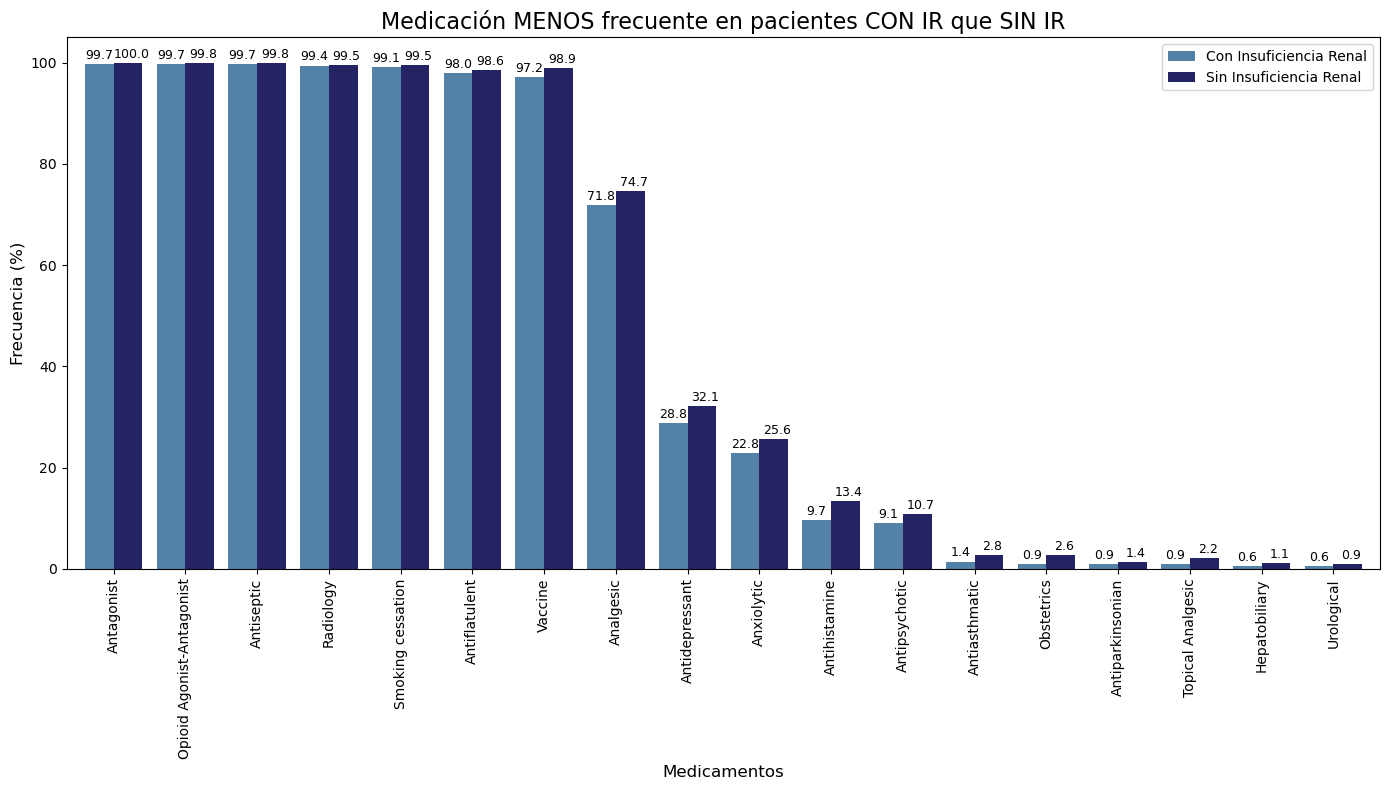

In [122]:
import matplotlib.pyplot as plt

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(14, 8))

# Colores personalizados
colors = ['#5481a6', '#242465']

# Dibujar las barras
bars = medication_IR_menor_noIR[['Frecuencia con IR', 'Frecuencia sin IR']].plot(
    kind='bar',
    stacked=False,
    width=0.8,
    ax=ax,
    color=colors
)

# Añadir etiquetas de datos
for i, (idx, row) in enumerate(medication_IR_menor_noIR.iterrows()):
    ax.text(i - 0.2, row['Frecuencia con IR'] + 1, f"{row['Frecuencia con IR']:.1f}", color='black', ha='center', fontsize=9)
    ax.text(i + 0.25, row['Frecuencia sin IR'] + 1, f"{row['Frecuencia sin IR']:.1f}", color='black', ha='center', fontsize=9)

# Etiquetas y título
ax.set_title('Medicación MENOS frecuente en pacientes CON IR que SIN IR', fontsize=16)
ax.set_xlabel('Medicamentos', fontsize=12)
ax.set_ylabel('Frecuencia (%)', fontsize=12)
ax.set_xticks(range(len(medication_IR_menor_noIR)))
ax.set_xticklabels(medication_IR_menor_noIR.index, rotation=90, fontsize=10)
ax.legend(['Con Insuficiencia Renal', 'Sin Insuficiencia Renal'], loc='upper right')

# Ajustar el diseño
plt.tight_layout()
plt.savefig('medicamentos_menor_frecuencia_IR_.png')


# Mostrar el gráfico
plt.show()



### 4- Feature Engineering

### 41- Eliminamos las variables numéricas con varianza 0

In [56]:
# Eliminar variables constantes
df_merged = df_merged.drop(columns=cte_vars)


In [57]:
df_merged.head()

patient_id           admittime gender  anchor_age        dod  \
0  1000297627179825 2145-02-28 19:44:00      M          70        NaT   
1  1001088820162667 2174-01-09 22:19:00      M          43        NaT   
2  1001356921741511 2165-01-14 23:05:00      F          54        NaT   
3  1002323929295881 2137-06-19 17:35:00      F          29        NaT   
4  1003075326429826 2190-09-27 05:08:00      F          47 2201-06-10   

  deathtime  Cardiología  Cirugía / Procedimientos Médicos  \
0       NaT         True                             False   
1       NaT        False                             False   
2       NaT         True                             False   
3       NaT        False                             False   
4       NaT         True                             False   

   Enfermedades Infecciosas  Factores Sociales / Exposición / Historial  ...  \
0                     False                                       False  ...   
1                     False                                       False  ...   
2                     False                                       False  ...   
3                      True                                       False  ...   
4                     False                                        True  ...   

   Phosphate-Blood-Chemistry  Platelet Count-Blood-Hematology  \
0                        2.4                            159.0   
1                        1.0                            147.0   
2                        3.6                            332.0   
3                        0.9                            256.0   
4                        3.5                            235.0   

   Potassium-Blood-Chemistry  RDW-Blood-Hematology  \
0                        4.2                  13.4   
1                        4.6                  12.6   
2                        4.7                  14.7   
3                        3.8                  13.2   
4                        4.9                  13.8   

   Red Blood Cells-Blood-Hematology  Sodium-Blood-Chemistry  \
0                              43.6                   137.0   
1                               4.4                   131.0   
2                               4.8                   141.0   
3                              35.5                   136.0   
4                              40.2                   139.0   

   Urea Nitrogen-Blood-Chemistry  White Blood Cells-Blood-Hematology  \
0                           34.0                                 5.5   
1                           71.0                                26.3   
2                           30.0                                 7.7   
3                           19.0                                12.6   
4                           24.0                                 8.1   

                     Grupo  toma medicacion  
0      Insuficiencia Renal            False  
1      Insuficiencia Renal             True  
2  Sin Insuficiencia Renal            False  
3  Sin Insuficiencia Renal            False  
4  Sin Insuficiencia Renal            False  

[5 rows x 97 columns]

In [60]:
df_merged.shape[0]

2220

### 2- Creamos nueva variable: murio (True/False)

In [61]:
# Crear variable booleana 'murio' según dod y deathtime
df_merged['murio'] = df_merged[['dod', 'deathtime']].notnull().any(axis=1)


In [62]:
print('Han muerto', df_merged[df_merged['murio']==True].shape[0], 'pacientes')

Han muerto 461 pacientes


#### Valores nulos

##### De los pacientes que toman medicación (995/2220)

In [63]:
# Filtrar pacientes que toman medicación
med_pats = df_merged[df_merged['toma medicacion'] == True]

# Ver nulos y su porcentaje
nulos_med = med_pats.isnull().sum()
nulos_pct = (nulos_med / len(med_pats)) * 100
nulos_filtrados = nulos_pct[nulos_pct > 0].sort_values(ascending=False)

print(nulos_filtrados)


Hepatobiliary            98.994975
Anticholinergic          98.592965
deathtime                98.492462
Antispasmodic            98.190955
Antiparkinsonian         98.090452
Obstetrics               97.989950
Antigout                 97.889447
Stimulant                97.889447
Antidote                 96.884422
Cardiovascular           96.180905
Muscle relaxant          95.879397
Expectorant              95.577889
Iron Supplements         94.371859
Antacid                  93.969849
Ophthalmic               93.467337
Gastrointestinal         93.366834
Renal                    93.266332
Antiviral                93.165829
Urological               92.361809
Immunosuppressant        91.457286
Antifungal               90.854271
Vasodilator              89.949749
Vasopressor              89.748744
Antipsychotic            89.648241
Anesthetic               88.241206
Oral Care                88.140704
Sedative                 87.839196
Antihistamine            87.738693
dod                 

Hay muchos pacientes del grupo "toma_medicacion"=TRUE CON VALORES NULOS asi que vamos a seguir este workflow:
    
- Caso 1: >95% de nulos:
        - Binarizacion (toma_xxxx):Iron Supplements, Cardiovascular
        - Eliminar: Hepatobiliary, Anticholinergic, Antispasmodic, Antiparkinsonian, Obstetrics, Antigout, Stimulant, Antidote, Expectorant, Muscle relaxant
        
- Caso 2: 70-95% de nulos:
        - Binarizar:Renal, Corticosteroid, Diuretic, Vasodilator, Vasopressor, Anesthetic, Supplement, Urological, Immunosupressant
        - Eliminar: Antacid, Ophthalmic, Gastrointestinal, Antiviral, Antifungal, Oral Care, H2 Antihistamine, Local Anesthetic, Vitamin, Anticonvulsant, Anxiolytic

- Caso 3: 30-69% de nulos
> Imputar: Antiplatelet, Fluid & Electrolyte, Lipid-lowering, Antibiotic
> Binarizar:Antidepressant, Proton Pump Inhibitor
> Eliminar: Antiemetic

- Caso 4: <30% nulos:
        - Imputar: Antihypertensive, Analgesic, Anticoagulant, Endocrine & Metabolic, Electrolyte


In [140]:
##ANTIGUO

# df_meds_procesado = med_pats.copy()


# # Listas de variables a eliminar 
# variables_eliminar = [
#     'Hepatobiliary','Anticholinergic', 'Antispasmodic', 'Antiparkinsonian', 'Obstetrics', 'Antigout',
#     'Stimulant', 'Antidote', 'Expectorant', 'Muscle relaxant', 'Antacid', 'Ophthalmic',
#     'Gastrointestinal', 'Antiviral', 'Antifungal', 'Oral Care',
#     'Local Anesthetic', 'Vitamin', 'Anticonvulsant', 'Anxiolytic', 'Antiemetic'
# ]

# # Variables a binarizar (crear columna "toma_X" = 1 si no nulo y > 0, 0 en caso contrario)
# variables_binarizar = [
#     'Iron Supplements', 'Cardiovascular', 'Renal', 'Corticosteroid', 'Diuretic',
#     'Vasodilator', 'Vasopressor', 'Anesthetic', 'Supplement',
#     'Antipsychotic', 'Proton Pump Inhibitor','Urological', 'Immunosuppressant', 'Sedative', 'Antihistamine', 'H2 Antihistamine'
# ]

# # Eliminar columnas irrelevantes
# df_meds_procesado.drop(columns=variables_eliminar, inplace=True, errors='ignore')

# # Crear columnas binarizadas
# for var in variables_binarizar:
#     nueva_col = f'toma_{var.lower().replace(" ", "_")}'
#     df_meds_procesado[nueva_col] = df_meds_procesado[var].notnull() & (df_meds_procesado[var] > 0)
#     df_meds_procesado[nueva_col] = df_meds_procesado[nueva_col].astype(int)
    

In [141]:
# df_meds_procesado.head()

In [142]:
df_meds_procesado = med_pats.copy()
df_merged_copy=df_merged.copy()


# Listas de variables a eliminar 
variables_eliminar = [
    'Hepatobiliary','Anticholinergic', 'Antispasmodic', 'Antiparkinsonian', 'Obstetrics', 'Antigout',
    'Stimulant', 'Antidote', 'Expectorant', 'Muscle relaxant', 'Antacid', 'Ophthalmic',
    'Gastrointestinal', 'Antiviral', 'Antifungal', 'Oral Care',
    'Local Anesthetic', 'Vitamin', 'Anticonvulsant', 'Anxiolytic', 'Antiemetic'
]

# Variables a binarizar (crear columna "toma_X" = 1 si no nulo y > 0, 0 en caso contrario)
variables_binarizar = [
    'Iron Supplements', 'Cardiovascular', 'Renal', 'Corticosteroid', 'Diuretic',
    'Vasodilator', 'Vasopressor', 'Anesthetic', 'Supplement',
    'Antipsychotic', 'Proton Pump Inhibitor','Urological', 'Immunosuppressant', 'Sedative', 'Antihistamine', 'H2 Antihistamine'
]

# Eliminar columnas irrelevantes
df_merged_copy.drop(columns=variables_eliminar, inplace=True, errors='ignore')

# Crear columnas binarizadas
for var in variables_binarizar:
    nueva_col = f'toma_{var.lower().replace(" ", "_")}'
    df_merged_copy[nueva_col] = df_merged_copy[var].notnull() & (df_merged_copy[var] > 0)
    df_merged_copy[nueva_col] = df_merged_copy[nueva_col].astype(int)

In [143]:
df_merged_copy.head()

patient_id           admittime gender  anchor_age        dod  \
0  1000297627179825 2145-02-28 19:44:00      M          70        NaT   
1  1001088820162667 2174-01-09 22:19:00      M          43        NaT   
2  1001356921741511 2165-01-14 23:05:00      F          54        NaT   
3  1002323929295881 2137-06-19 17:35:00      F          29        NaT   
4  1003075326429826 2190-09-27 05:08:00      F          47 2201-06-10   

  deathtime  Cardiología  Cirugía / Procedimientos Médicos  \
0       NaT         True                             False   
1       NaT        False                             False   
2       NaT         True                             False   
3       NaT        False                             False   
4       NaT         True                             False   

   Enfermedades Infecciosas  Factores Sociales / Exposición / Historial  ...  \
0                     False                                       False  ...   
1                     False                                       False  ...   
2                     False                                       False  ...   
3                      True                                       False  ...   
4                     False                                        True  ...   

   toma_vasopressor  toma_anesthetic  toma_supplement  toma_antipsychotic  \
0                 0                0                0                   0   
1                 1                1                0                   1   
2                 0                0                0                   0   
3                 0                0                0                   0   
4                 0                0                0                   0   

   toma_proton_pump_inhibitor  toma_urological  toma_immunosuppressant  \
0                           0                0                       0   
1                           0                0                       0   
2                           0                0                       0   
3                           0                0                       0   
4                           0                0                       0   

   toma_sedative  toma_antihistamine  toma_h2_antihistamine  
0              0                   0                      0  
1              1                   0                      1  
2              0                   0                      0  
3              0                   0                      0  
4              0                   0                      0  

[5 rows x 93 columns]

In [144]:
# Mostrar lista de columnas esperadas para validación
max_len = max(len(variables_eliminar), len(variables_binarizar))

# Rellenar con None para igualar longitud
variables_eliminar += [None] * (max_len - len(variables_eliminar))
variables_binarizar += [None] * (max_len - len(variables_binarizar))

# Crear DataFrame organizado
df_resultado = pd.DataFrame({
    "Variables a eliminar": variables_eliminar,
    "Variables a binarizar": variables_binarizar
})
df_resultado

Variables a eliminar  Variables a binarizar
0         Hepatobiliary       Iron Supplements
1       Anticholinergic         Cardiovascular
2         Antispasmodic                  Renal
3      Antiparkinsonian         Corticosteroid
4            Obstetrics               Diuretic
5              Antigout            Vasodilator
6             Stimulant            Vasopressor
7              Antidote             Anesthetic
8           Expectorant             Supplement
9       Muscle relaxant          Antipsychotic
10              Antacid  Proton Pump Inhibitor
11           Ophthalmic             Urological
12     Gastrointestinal      Immunosuppressant
13            Antiviral               Sedative
14           Antifungal          Antihistamine
15            Oral Care       H2 Antihistamine
16     Local Anesthetic                   None
17              Vitamin                   None
18       Anticonvulsant                   None
19           Anxiolytic                   None
20           Antiemetic                   None

In [145]:
# #ANTIGUO

# #Caso 3: Imputar columnas 30–69 % nulos que son menos críticos con la mediana
# from sklearn.impute import SimpleImputer

# # Crear copia de trabajo
# df_imputado = df_meds_procesado.copy()

# # Variables del caso 3 (30–69% nulos): imputar con mediana
# variables_caso3_mediana = [
#     'Antiplatelet', 'Fluid & Electrolyte', 'Lipid-lowering', 'Antibiotic', 'Antidepressant'
# ]

# # Filtrar las que existen y son numéricas
# variables_caso3_validas = [
#     col for col in variables_caso3_mediana 
#     if col in df_imputado.columns and pd.api.types.is_numeric_dtype(df_imputado[col])
# ]

# # Aplicar SimpleImputer con mediana
# if variables_caso3_validas:
#     imputer = SimpleImputer(strategy='median')
#     df_imputado[variables_caso3_validas] = imputer.fit_transform(df_imputado[variables_caso3_validas])



In [146]:
# df_imputado.head()

In [147]:
# # Excluir variables binarizadas (todas las que empiezan por "toma_")
# columnas_no_binarizadas = [col for col in df_imputado.columns if not variables_binarizar ]

# # Calcular porcentaje de nulos solo en variables no binarizadas
# null_percentages_filtrado = df_imputado[columnas_no_binarizadas].isnull().mean() * 100

# # Filtrar columnas con nulos
# null_status_filtrado = null_percentages_filtrado[null_percentages_filtrado > 0].sort_values(ascending=False).to_frame(name='Porcentaje_nulos')
# null_status_filtrado['Tipo_de_dato'] = df_imputado[null_status_filtrado.index].dtypes.values

# null_status_filtrado

In [148]:
# Lista de columnas a revisar
columns = [
    'Analgesic', 'Antibiotic', 'Anticoagulant', 'Antidepressant',
    'Antihypertensive', 'Antiplatelet', 'BUN/Creatinina', 'eGFR',
    'Electrolyte', 'Fluid & Electrolyte', 'Lipid-lowering'
]

# Contar valores nulos en las columnas especificadas
for col in columns:
    if col in df_imputado_general.columns:
        null_count = df_imputado_general[col].isnull().sum()
        print(f"Columna {col}: {null_count} valores nulos")


NameError: name 'df_imputado_general' is not defined

In [149]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Crear copia de trabajo
df_imputado_general = df_merged_copy.copy()

# Variables del caso 3 (30–69% nulos): imputar con mediana
variables_caso3_mediana = [
    'Antiplatelet', 'Fluid & Electrolyte', 'Lipid-lowering', 'Antibiotic', 'Antidepressant'
]

# Filtrar las que existen y son numéricas
variables_caso3_validas = [
    col for col in variables_caso3_mediana 
    if col in df_imputado_general.columns and pd.api.types.is_numeric_dtype(df_imputado_general[col])
]

# Imputar con la mediana para las variables válidas
if variables_caso3_validas:
    imputer = SimpleImputer(strategy='median')
    df_imputado_general[variables_caso3_validas] = imputer.fit_transform(df_imputado_general[variables_caso3_validas])

# Imputar con 0 en las filas donde 'toma medicacion' es False
df_imputado_general.loc[df_imputado_general['toma medicacion'] == False, variables_caso3_validas] = pd.NA


In [150]:
# Verificar si las filas con 'toma medicacion' == False han sido imputadas con 0
print(df_imputado_general.loc[df_imputado_general['toma medicacion'] == False, variables_caso3_validas].head())


   Antiplatelet  Fluid & Electrolyte  Lipid-lowering  Antibiotic  \
0           NaN                  NaN             NaN         NaN   
2           NaN                  NaN             NaN         NaN   
3           NaN                  NaN             NaN         NaN   
4           NaN                  NaN             NaN         NaN   
5           NaN                  NaN             NaN         NaN   

   Antidepressant  
0             NaN  
2             NaN  
3             NaN  
4             NaN  
5             NaN  


In [151]:
# Verificar las estadísticas de las columnas antes y después de la imputación
print("Estadísticas antes de imputar:")
print(df_merged_copy[variables_caso3_validas].isnull().sum())  # Antes de la imputación

print("\nEstadísticas después de imputar:")
print(df_imputado_general[variables_caso3_validas].isnull().sum())  # Después de la imputación


Estadísticas antes de imputar:
Antiplatelet           1839
Fluid & Electrolyte    1792
Lipid-lowering         1789
Antibiotic             1695
Antidepressant         1910
dtype: int64

Estadísticas después de imputar:
Antiplatelet           1225
Fluid & Electrolyte    1225
Lipid-lowering         1225
Antibiotic             1225
Antidepressant         1225
dtype: int64


In [152]:
# #Caso 3: Imputar columnas 30–69 % nulos que son menos críticos con la mediana
# from sklearn.impute import SimpleImputer

# # Crear copia de trabajo
# df_imputado_general = df_merged_copy.copy()

# # Variables del caso 3 (30–69% nulos): imputar con mediana
# variables_caso3_mediana = [
#     'Antiplatelet', 'Fluid & Electrolyte', 'Lipid-lowering', 'Antibiotic', 'Antidepressant'
# ]

# # Filtrar las que existen y son numéricas
# variables_caso3_validas = [
#     col for col in variables_caso3_mediana 
#     if col in df_imputado_general.columns and pd.api.types.is_numeric_dtype(df_imputado_general[col])
# ]

# # Aplicar SimpleImputer con mediana
# if variables_caso3_validas:
#     imputer = SimpleImputer(strategy='median')
#     df_imputado_general[variables_caso3_validas] = imputer.fit_transform(df_imputado_general[variables_caso3_validas])

In [153]:
# Excluir variables binarizadas (todas las que empiezan por "toma_")
columnas_no_binarizadas = [col for col in  df_imputado_general.columns if not variables_binarizar ]

# Calcular porcentaje de nulos solo en variables no binarizadas
null_percentages_filtrado =  df_imputado_general[columnas_no_binarizadas].isnull().mean() * 100

# Filtrar columnas con nulos
null_status_filtrado = null_percentages_filtrado[null_percentages_filtrado > 0].sort_values(ascending=False).to_frame(name='Porcentaje_nulos')
null_status_filtrado['Tipo_de_dato'] =  df_imputado_general[null_status_filtrado.index].dtypes.values

null_status_filtrado

Empty DataFrame
Columns: [Porcentaje_nulos, Tipo_de_dato]
Index: []

In [154]:
# ANTIGUO

# # Caso 4: Imputar columnas con <30% de nulos usando KNNImputer

# from sklearn.impute import KNNImputer
# # Lista de columnas especificadas por Ana para imputar con KNN
# columnas_4= [
#     'Antihypertensive', 'Analgesic', 'Anticoagulant', 'Endocrine & Metabolic', 'Electrolyte'
# ]

# # Verificar que existen en el DataFrame y son numéricas
# columnas_4_existentes= [
#     col for col in columnas_4
#     if col in df_imputado.columns and pd.api.types.is_numeric_dtype(df_imputado[col])
# ]

# # Aplicar KNNImputer si hay columnas válidas
# if columnas_4_existentes:
#     knn_imputer = KNNImputer(n_neighbors=5)
#     df_imputado[columnas_4_existentes] = knn_imputer.fit_transform(df_imputado[columnas_4_existentes])


In [155]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Seleccionar las columnas que se imputaron en el caso 4
# columnas_imputadas = [
#     'Antihypertensive', 'Analgesic', 'Anticoagulant', 'Endocrine & Metabolic', 'Electrolyte'
# ]

# # Verificar que existen en el DataFrame
# columnas_existentes = [col for col in columnas_imputadas if col in df_imputado.columns]

# # Graficar la distribución de cada variable
# for col in columnas_existentes:
#     plt.figure(figsize=(6, 3))
#     sns.histplot(df_imputado[col], kde=True, bins=30)
#     plt.title(f'Distribución de: {col}')
#     plt.xlabel('Valor')
#     plt.ylabel('Frecuencia')
#     plt.tight_layout()
#     plt.show()


In [156]:
# # Caso 4: Imputar columnas con <30% de nulos usando KNNImputer

# from sklearn.impute import KNNImputer
# # Lista de columnas especificadas por Ana para imputar con KNN
# columnas_4= [
#     'Antihypertensive', 'Analgesic', 'Anticoagulant', 'Endocrine & Metabolic', 'Electrolyte'
# ]

# # Verificar que existen en el DataFrame y son numéricas
# columnas_4_existentes= [
#     col for col in columnas_4
#     if col in df_imputado_general.columns and pd.api.types.is_numeric_dtype(df_imputado_general[col])
# ]

# # Aplicar KNNImputer si hay columnas válidas
# if columnas_4_existentes:
#     knn_imputer = KNNImputer(n_neighbors=5)
#     df_imputado_general[columnas_4_existentes] = knn_imputer.fit_transform(df_imputado_general[columnas_4_existentes])


In [157]:
from sklearn.impute import KNNImputer
import pandas as pd

# Lista de columnas especificadas por Ana para imputar con KNN
columnas_4 = [
    'Antihypertensive', 'Analgesic', 'Anticoagulant', 'Endocrine & Metabolic', 'Electrolyte'
]

# Verificar que existen en el DataFrame y son numéricas
columnas_4_existentes = [
    col for col in columnas_4
    if col in df_imputado_general.columns and pd.api.types.is_numeric_dtype(df_imputado_general[col])
]

# Imputar con KNNImputer si hay columnas válidas
if columnas_4_existentes:
    knn_imputer = KNNImputer(n_neighbors=5)
    df_imputado_general[columnas_4_existentes] = knn_imputer.fit_transform(df_imputado_general[columnas_4_existentes])

# Imputar con 0 en las filas donde 'toma medicacion' == False
df_imputado_general.loc[df_imputado_general['toma medicacion'] == False, columnas_4_existentes] = pd.NA

# Verificar que la imputación con 0 se ha realizado correctamente
print(df_imputado_general.loc[df_imputado_general['toma medicacion'] == False, columnas_4_existentes].head())

# Verificar las estadísticas de las columnas antes y después de la imputación
print("Estadísticas antes de imputar:")
print(df_merged_copy[columnas_4_existentes].isnull().sum())  # Antes de la imputación

print("\nEstadísticas después de imputar:")
print(df_imputado_general[columnas_4_existentes].isnull().sum())  # Después de la imputación


   Antihypertensive  Analgesic  Anticoagulant  Endocrine & Metabolic  \
0               NaN        NaN            NaN                    NaN   
2               NaN        NaN            NaN                    NaN   
3               NaN        NaN            NaN                    NaN   
4               NaN        NaN            NaN                    NaN   
5               NaN        NaN            NaN                    NaN   

   Electrolyte  
0          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
Estadísticas antes de imputar:
Antihypertensive         1674
Analgesic                1486
Anticoagulant            1449
Endocrine & Metabolic    1342
Electrolyte              1295
dtype: int64

Estadísticas después de imputar:
Antihypertensive         1225
Analgesic                1225
Anticoagulant            1225
Endocrine & Metabolic    1225
Electrolyte              1225
dtype: int64


In [158]:
# # Lista de variables que NO queremos incluir en la comprobación de nulos
# variables_binarizar_excluidas = [
#     'Iron Supplements', 'Cardiovascular', 'Renal', 'Corticosteroid', 'Diuretic',
#     'Vasodilator', 'Vasopressor', 'Anesthetic', 'Supplement',
#     'Antipsychotic', 'Proton Pump Inhibitor', 'Urological', 'Immunosuppressant',
#     'Sedative', 'Antihistamine', 'H2 Antihistamine'
# ]

# # Filtrar columnas que no están en esa lista
# columnas_a_revisar = [col for col in df_imputado.columns if col not in variables_binarizar_excluidas]

# # Comprobar nulos solo en esas columnas
# nulos_filtrados = df_imputado[columnas_a_revisar].isnull().sum()
# nulos_filtrados = nulos_filtrados[nulos_filtrados > 0].sort_values(ascending=False).to_frame(name='Nulos restantes')
# nulos_filtrados['% Nulos'] = (nulos_filtrados['Nulos restantes'] / len(df_imputado)) * 100
# nulos_filtrados['Tipo de dato'] = df_imputado[nulos_filtrados.index].dtypes.values
# nulos_filtrados

In [159]:
# Lista de variables que NO queremos incluir en la comprobación de nulos
variables_binarizar_excluidas = [
    'Iron Supplements', 'Cardiovascular', 'Renal', 'Corticosteroid', 'Diuretic',
    'Vasodilator', 'Vasopressor', 'Anesthetic', 'Supplement',
    'Antipsychotic', 'Proton Pump Inhibitor', 'Urological', 'Immunosuppressant',
    'Sedative', 'Antihistamine', 'H2 Antihistamine'
]

# Filtrar columnas que no están en esa lista
columnas_a_revisar = [col for col in df_imputado_general.columns if col not in variables_binarizar_excluidas]

# Comprobar nulos solo en esas columnas
nulos_filtrados = df_imputado_general[columnas_a_revisar].isnull().sum()
nulos_filtrados = nulos_filtrados[nulos_filtrados > 0].sort_values(ascending=False).to_frame(name='Nulos restantes')
nulos_filtrados['% Nulos'] = (nulos_filtrados['Nulos restantes'] / len(df_imputado_general)) * 100
nulos_filtrados['Tipo de dato'] = df_imputado_general[nulos_filtrados.index].dtypes.values
nulos_filtrados

Nulos restantes    % Nulos    Tipo de dato
deathtime                         2200  99.099099  datetime64[ns]
dod                               1759  79.234234  datetime64[ns]
Analgesic                         1225  55.180180         float64
Antibiotic                        1225  55.180180         float64
Anticoagulant                     1225  55.180180         float64
Antidepressant                    1225  55.180180         float64
Antihypertensive                  1225  55.180180         float64
Antiplatelet                      1225  55.180180         float64
Electrolyte                       1225  55.180180         float64
Endocrine & Metabolic             1225  55.180180         float64
Fluid & Electrolyte               1225  55.180180         float64
Lipid-lowering                    1225  55.180180         float64

In [160]:
# Lista de variables de medicación 
variables_medicacion = [
    "Analgesic", "Anesthetic", "Antacid", "Antagonist", "Antiasthmatic", "Antibiotic",
    "Anticholinergic", "Anticoagulant", "Anticonvulsant", "Antidepressant", "Antidiarrheal",
    "Antidote", "Antiemetic", "Antiflatulent", "Antifungal", "Antigout", "Antihistamine",
    "Antihypertensive", "Antiparkinsonian", "Antiplatelet", "Antipsychotic", "Antiseptic",
    "Antispasmodic", "Antitussive", "Antiviral", "Anxiolytic", "Cardiovascular", "Corticosteroid",
    "Diuretic", "Electrolyte", "Endocrine & Metabolic", "Expectorant", "Fluid & Electrolyte",
    "Gastrointestinal", "H2 Antihistamine", "Hepatobiliary", "Immunosuppressant",
    "Iron Supplements", "Laxative", "Lipid-lowering", "Local Anesthetic", "Muscle Relaxant",
    "Muscle relaxant", "Obstetrics", "Ophthalmic", "Opioid Agonist-Antagonist", "Oral Care",
    "Proton Pump Inhibitor", "Radiology", "Renal", "Respiratory", "Sedative",
    "Sedatives & Analgesics", "Smoking cessation", "Stimulant", "Supplement", "Thrombolytic",
    "Topical", "Topical Analgesic", "Topical Antibiotic", "Urological", "Vaccine",
    "Vasodilator", "Vasopressor", "Vitamin"
]

# Filtrar las columnas de medicación que existen en el DataFrame y son numéricas
columnas_medicacion_validas = [
    col for col in variables_medicacion
    if col in df_imputado.columns and pd.api.types.is_numeric_dtype(df_imputado[col])
]

# Crear subplots con estas columnas
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_vars = len(columnas_medicacion_validas)
cols = 3
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(columnas_medicacion_validas):
    sns.histplot(df_imputado[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



NameError: name 'df_imputado' is not defined

## Hasta aqui la ultima copia con todos los cambios en medicación se llama df_imputado

### Crear variables egfr y bun/creatinina

Interpretación de resultados:
    
eGFR >90 → normal (si no hay otra enfermedad)

eGFR 60-89 → función renal levemente disminuida

eGFR 30-59 → insuficiencia renal moderada

eGFR 15-29 → insuficiencia renal severa

eGFR <15 → insuficiencia renal terminal

Interpretación de resultados:
    
- Si BUN/creatinina > 20, sugiere hipoperfusión renal (causas prerrenales, como deshidratación).

- Si BUN/creatinina ≈ 10-20, sugiere problema intrínseco renal (daño real en el riñón).



In [161]:
# Crear copia de trabajo
df_variables_nuevas = df_imputado_general.copy()  #Cambiar al df completo que tb tenga en cuenta a los pacientes sin medicacion.

# Verificar nombres de columnas necesarias para el cálculo
col_creatinina = 'Creatinine-Blood-Chemistry'
col_bun = 'Urea Nitrogen-Blood-Chemistry'
col_edad = 'anchor_age'
col_sexo = 'gender'

# Crear la función de eGFR vectorizada
def calcular_egfr_vectorizado(creatinina, edad, sexo):
    sexo = sexo.astype(str) 
    k = sexo.map({'F': 0.7, 'M': 0.9})
    a = sexo.map({'F': -0.329, 'M': -0.411})
    factor_sexo = sexo.map({'F': 1.018, 'M': 1.0})
    
    cr_k = creatinina / k
    min_cr_k = cr_k.clip(upper=1)
    max_cr_k = cr_k.clip(lower=1)
    
    egfr = round(141 * (min_cr_k ** a) * (max_cr_k ** -1.209) * (0.993 ** edad) * factor_sexo, 2)
    return egfr

# Crear la variable eGFR
df_variables_nuevas['eGFR'] = calcular_egfr_vectorizado(
    df_variables_nuevas[col_creatinina],
    df_variables_nuevas[col_edad],
    df_variables_nuevas[col_sexo]
)

# Crear el ratio BUN/creatinina
df_variables_nuevas['BUN/Creatinina'] = round(df_variables_nuevas[col_bun] / df_variables_nuevas[col_creatinina], 2)

# Reemplazar divisiones inválidas con NaN (creatinina = 0)
df_variables_nuevas['BUN/Creatinina'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Asignar 0 a las nuevas columnas cuando 'toma medicacion' == False
df_variables_nuevas.loc[df_variables_nuevas['toma medicacion'] == False, ['eGFR', 'BUN/Creatinina']] = 0

# Verificar los resultados
#print(df_variables_nuevas.loc[df_variables_nuevas['toma medicacion'] == False, ['eGFR', 'BUN/Creatinina']].head())


   eGFR  BUN/Creatinina
0   0.0             0.0
2   0.0             0.0
3   0.0             0.0
4   0.0             0.0
5   0.0             0.0


In [162]:
df_variables_nuevas.head()

patient_id           admittime gender  anchor_age        dod  \
0  1000297627179825 2145-02-28 19:44:00      M          70        NaT   
1  1001088820162667 2174-01-09 22:19:00      M          43        NaT   
2  1001356921741511 2165-01-14 23:05:00      F          54        NaT   
3  1002323929295881 2137-06-19 17:35:00      F          29        NaT   
4  1003075326429826 2190-09-27 05:08:00      F          47 2201-06-10   

  deathtime  Cardiología  Cirugía / Procedimientos Médicos  \
0       NaT         True                             False   
1       NaT        False                             False   
2       NaT         True                             False   
3       NaT        False                             False   
4       NaT         True                             False   

   Enfermedades Infecciosas  Factores Sociales / Exposición / Historial  ...  \
0                     False                                       False  ...   
1                     False                                       False  ...   
2                     False                                       False  ...   
3                      True                                       False  ...   
4                     False                                        True  ...   

   toma_supplement  toma_antipsychotic  toma_proton_pump_inhibitor  \
0                0                   0                           0   
1                0                   1                           0   
2                0                   0                           0   
3                0                   0                           0   
4                0                   0                           0   

   toma_urological  toma_immunosuppressant  toma_sedative  toma_antihistamine  \
0                0                       0              0                   0   
1                0                       0              1                   0   
2                0                       0              0                   0   
3                0                       0              0                   0   
4                0                       0              0                   0   

   toma_h2_antihistamine   eGFR  BUN/Creatinina  
0                      0   0.00             0.0  
1                      1  30.31            28.4  
2                      0   0.00             0.0  
3                      0   0.00             0.0  
4                      0   0.00             0.0  

[5 rows x 95 columns]

In [163]:
df_variables_nuevas[df_variables_nuevas['toma medicacion'] == False].head()

patient_id           admittime gender  anchor_age        dod  \
0  1000297627179825 2145-02-28 19:44:00      M          70        NaT   
2  1001356921741511 2165-01-14 23:05:00      F          54        NaT   
3  1002323929295881 2137-06-19 17:35:00      F          29        NaT   
4  1003075326429826 2190-09-27 05:08:00      F          47 2201-06-10   
5  1003331223523392 2151-12-22 00:23:00      F          52        NaT   

  deathtime  Cardiología  Cirugía / Procedimientos Médicos  \
0       NaT         True                             False   
2       NaT         True                             False   
3       NaT        False                             False   
4       NaT         True                             False   
5       NaT         True                             False   

   Enfermedades Infecciosas  Factores Sociales / Exposición / Historial  ...  \
0                     False                                       False  ...   
2                     False                                       False  ...   
3                      True                                       False  ...   
4                     False                                        True  ...   
5                     False                                       False  ...   

   toma_supplement  toma_antipsychotic  toma_proton_pump_inhibitor  \
0                0                   0                           0   
2                0                   0                           0   
3                0                   0                           0   
4                0                   0                           0   
5                0                   0                           0   

   toma_urological  toma_immunosuppressant  toma_sedative  toma_antihistamine  \
0                0                       0              0                   0   
2                0                       0              0                   0   
3                0                       0              0                   0   
4                0                       0              0                   0   
5                0                       0              0                   0   

   toma_h2_antihistamine  eGFR  BUN/Creatinina  
0                      0   0.0             0.0  
2                      0   0.0             0.0  
3                      0   0.0             0.0  
4                      0   0.0             0.0  
5                      0   0.0             0.0  

[5 rows x 95 columns]

#### Visualicemos cuántos pacientes tienen estos valores alterados

In [131]:
# Crear copia para trabajar con los resultados interpretados
df_resultados = df_variables_nuevas.copy()

# Recalcular eGFR y BUN/Creatinina (asumiendo que están presentes)
# Si no, estas líneas se deberían ejecutar previamente

# eGFR: crear columna de interpretación categórica
def interpretar_egfr(valor):
    if valor >= 90:
        return "Normal"
    elif 60 <= valor < 90:
        return "Función renal levemente disminuida"
    elif 30 <= valor < 60:
        return "Insuficiencia renal moderada"
    elif 15 <= valor < 30:
        return "Insuficiencia renal severa"
    else:
        return "Insuficiencia renal terminal"

df_resultados['eGFR_categoria'] = df_resultados['eGFR'].apply(interpretar_egfr)

# BUN/Creatinina: crear columna de interpretación
def interpretar_bun_creatinina(ratio):
    if pd.isna(ratio):
        return "Desconocido"
    elif ratio > 20:
        return "Niveles altos" # Causas: diabetes, deshidratación, insuficiencia cardíaca, dieta alta en proteinas o por ciertos medicamentos
    elif 10 <= ratio <= 20:
        return "Normal"
    elif ratio<10:
        return  "Niveles bajos" # Causas: Malnutrición, enfermedad hepática, dieta con bajo contenido de proteínas, a una lesión muscular grave (rabdomiólisis), al embarazo, a cirrosis o al síndrome de secreción inapropiada de hormona antidiurética (SIADH)
    else:
        return "Considerar otras causas"

df_resultados['BUN/Cr_interpretacion'] = df_resultados['BUN/Creatinina'].apply(interpretar_bun_creatinina)

# Generar conteos
conteo_egfr = df_resultados['eGFR_categoria'].value_counts().rename_axis('Categoría eGFR').to_frame('N pacientes')
conteo_egfr['%'] = round(100 * conteo_egfr['N pacientes'] / len(df_resultados), 2)

conteo_bun = df_resultados['BUN/Cr_interpretacion'].value_counts().rename_axis('Interpretación BUN/Cr').to_frame('N pacientes')
conteo_bun['%'] = round(100 * conteo_bun['N pacientes'] / len(df_resultados), 2)


In [132]:
conteo_egfr

N pacientes      %
Categoría eGFR                                        
Insuficiencia renal terminal               1302  58.65
Normal                                      354  15.95
Insuficiencia renal moderada                312  14.05
Función renal levemente disminuida          180   8.11
Insuficiencia renal severa                   72   3.24

In [133]:
conteo_bun

N pacientes      %
Interpretación BUN/Cr                    
Niveles bajos                 1317  59.32
Normal                         662  29.82
Niveles altos                  241  10.86

In [134]:
df_variables_nuevas.columns

Index(['patient_id', 'admittime', 'gender', 'anchor_age', 'dod', 'deathtime',
       'Cardiología', 'Cirugía / Procedimientos Médicos',
       'Enfermedades Infecciosas',
       'Factores Sociales / Exposición / Historial',
       'Gastroenterología / Digestivo', 'Insuficiencia Renal',
       'Metabólicas Y Nutricionales', 'Nefrología', 'Neumología', 'Oncología',
       'Reumatología', 'Salud Mental Y Neurológica', 'Analgesic', 'Anesthetic',
       'Antagonist', 'Antibiotic', 'Anticoagulant', 'Antidepressant',
       'Antiflatulent', 'Antihistamine', 'Antihypertensive', 'Antiplatelet',
       'Antipsychotic', 'Antiseptic', 'Antitussive', 'Cardiovascular',
       'Corticosteroid', 'Diuretic', 'Electrolyte', 'Endocrine & Metabolic',
       'Fluid & Electrolyte', 'H2 Antihistamine', 'Immunosuppressant',
       'Iron Supplements', 'Laxative', 'Lipid-lowering',
       'Opioid Agonist-Antagonist', 'Proton Pump Inhibitor', 'Radiology',
       'Renal', 'Respiratory', 'Sedative', 'Smoking cessa

In [164]:
df_variables_nuevas=df_variables_nuevas.set_index('patient_id')

In [165]:
df_variables_nuevas.index = df_variables_nuevas.index.map(str)

In [137]:
#Creamos nuevas variables para las variables que habiamos binarizado al principio:
medicamentos_consulta = [
    'Antagonist', 'Antiflatulent', 'Antiseptic', 'Antitussive', 'Laxative',
    'Opioid Agonist-Antagonist', 'Radiology', 'Respiratory', 'Smoking cessation', 'Vaccine'
]

# Crear diccionario con los valores únicos de cada uno
valores_unicos = {}
for med in medicamentos_consulta:
    if med in df_variables_nuevas.columns:
        valores_unicos[med] = sorted(df_variables_nuevas[med].dropna().unique())

# Convertir a DataFrame para mostrar
df_valores_unicos = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in valores_unicos.items()]))
df_valores_unicos 

Antagonist  Antiflatulent  Antiseptic  Antitussive  Laxative  \
0       False          False       False        False     False   
1        True           True        True         True      True   

   Opioid Agonist-Antagonist  Radiology  Respiratory  Smoking cessation  \
0                      False      False        False              False   
1                       True       True         True               True   

   Vaccine  
0    False  
1     True

In [138]:
for var in medicamentos_consulta:
    nueva_col = f'toma_{var.lower().replace(" ", "_")}'
    df_variables_nuevas[nueva_col] = df_variables_nuevas[var].notnull() & (df_variables_nuevas[var] > 0)
    df_variables_nuevas[nueva_col] = df_variables_nuevas[nueva_col].astype(int)


In [139]:
 df_variables_nuevas.head()

admittime gender  anchor_age        dod deathtime  \
patient_id                                                                     
1000297627179825 2145-02-28 19:44:00      M          70        NaT       NaT   
1001088820162667 2174-01-09 22:19:00      M          43        NaT       NaT   
1001356921741511 2165-01-14 23:05:00      F          54        NaT       NaT   
1002323929295881 2137-06-19 17:35:00      F          29        NaT       NaT   
1003075326429826 2190-09-27 05:08:00      F          47 2201-06-10       NaT   

                  Cardiología  Cirugía / Procedimientos Médicos  \
patient_id                                                        
1000297627179825         True                             False   
1001088820162667        False                             False   
1001356921741511         True                             False   
1002323929295881        False                             False   
1003075326429826         True                             False   

                  Enfermedades Infecciosas  \
patient_id                                   
1000297627179825                     False   
1001088820162667                     False   
1001356921741511                     False   
1002323929295881                      True   
1003075326429826                     False   

                  Factores Sociales / Exposición / Historial  \
patient_id                                                     
1000297627179825                                       False   
1001088820162667                                       False   
1001356921741511                                       False   
1002323929295881                                       False   
1003075326429826                                        True   

                  Gastroenterología / Digestivo  ...  toma_antagonist  \
patient_id                                       ...                    
1000297627179825                          False  ...                1   
1001088820162667                          False  ...                1   
1001356921741511                          False  ...                1   
1002323929295881                          False  ...                1   
1003075326429826                           True  ...                1   

                  toma_antiflatulent  toma_antiseptic  toma_antitussive  \
patient_id                                                                
1000297627179825                   1                1                 1   
1001088820162667                   1                1                 1   
1001356921741511                   1                1                 1   
1002323929295881                   1                1                 1   
1003075326429826                   1                1                 1   

                  toma_laxative  toma_opioid_agonist-antagonist  \
patient_id                                                        
1000297627179825              1                               1   
1001088820162667              1                               1   
1001356921741511              1                               1   
1002323929295881              1                               1   
1003075326429826              1                               1   

                  toma_radiology  toma_respiratory  toma_smoking_cessation  \
patient_id                                                                   
1000297627179825               1                 1                       1   
1001088820162667               1                 1                       1   
1001356921741511               1                 1                       1   
1002323929295881               1                 1                       1   
1003075326429826               1                 1                       1   

                  toma_vaccine  
patient_id                      
1000297627179825             1  
1001088820162667             1  
1001356921741511             1  
1002

In [140]:
df_variables_nuevas.shape[0]

2220

In [191]:
import pandas as pd
import numpy as np
# Copiar DataFrame
df_categorized = df_variables_nuevas.copy()


# Lista de columnas a clasificar
columns = [
    'Analgesic', 'Antibiotic', 'Anticoagulant', 'Antidepressant',
    'Antihypertensive', 'Antiplatelet',
    'Electrolyte', 'Fluid & Electrolyte', 'Lipid-lowering', 'Endocrine & Metabolic'

]

# Función para clasificar la dosis según los percentiles
def clasificar_dosis(col):
    percentil_25 = col.quantile(0.25)
    percentil_75 = col.quantile(0.75)
    return col.apply(lambda x: 0 if pd.isnull(x)
                     else 1 if x < percentil_25
                     else 2 if x <= percentil_75
                     else 3)

# Crear nuevas columnas clasificadas
for col in columns:
    if col in df_categorized.columns:
        df_categorized[col + '_class'] = clasificar_dosis(df_categorized[col])

In [192]:
df_categorized.head()

admittime gender  anchor_age        dod deathtime  \
patient_id                                                                     
1000297627179825 2145-02-28 19:44:00      M          70        NaT       NaT   
1001088820162667 2174-01-09 22:19:00      M          43        NaT       NaT   
1001356921741511 2165-01-14 23:05:00      F          54        NaT       NaT   
1002323929295881 2137-06-19 17:35:00      F          29        NaT       NaT   
1003075326429826 2190-09-27 05:08:00      F          47 2201-06-10       NaT   

                  Cardiología  Cirugía / Procedimientos Médicos  \
patient_id                                                        
1000297627179825         True                             False   
1001088820162667        False                             False   
1001356921741511         True                             False   
1002323929295881        False                             False   
1003075326429826         True                             False   

                  Enfermedades Infecciosas  \
patient_id                                   
1000297627179825                     False   
1001088820162667                     False   
1001356921741511                     False   
1002323929295881                      True   
1003075326429826                     False   

                  Factores Sociales / Exposición / Historial  \
patient_id                                                     
1000297627179825                                       False   
1001088820162667                                       False   
1001356921741511                                       False   
1002323929295881                                       False   
1003075326429826                                        True   

                  Gastroenterología / Digestivo  ...  Analgesic_class  \
patient_id                                       ...                    
1000297627179825                          False  ...                0   
1001088820162667                          False  ...                2   
1001356921741511                          False  ...                0   
1002323929295881                          False  ...                0   
1003075326429826                           True  ...                0   

                  Antibiotic_class  Anticoagulant_class  Antidepressant_class  \
patient_id                                                                      
1000297627179825                 0                    0                     0   
1001088820162667                 1                    2                     2   
1001356921741511                 0                    0                     0   
1002323929295881                 0                    0                     0   
1003075326429826                 0                    0                     0   

                  Antihypertensive_class  Antiplatelet_class  \
patient_id                                                     
1000297627179825                       0                   0   
1001088820162667                       2                   2   
1001356921741511                       0                   0   
1002323929295881                       0                   0   
1003075326429826                       0                   0   

                  Electrolyte_class  Fluid & Electrolyte_class  \
patient_id                                                       
1000297627179825                  0                          0   
1001088820162667                  2                          1   
1001356921741511                  0                          0   
1002323929295881                  0                          0   
1003075326429826                  0                          0   

                  Lipid-lowering_class  Endocrine & Metabolic_class  
patient_id                                                           
1000297627179825                     0                            0  
1001088820162667      

In [193]:
for col in columns:
    class_col = col + '_class'
    if class_col in df_categorized.columns:
        print(f"Distribución para {col}:")
        print(df_categorized[class_col].value_counts().sort_index())
        print("\n")

Distribución para Analgesic:
0    1225
1     125
2     621
3     249
Name: Analgesic_class, dtype: int64


Distribución para Antibiotic:
0    1225
1     246
2     500
3     249
Name: Antibiotic_class, dtype: int64


Distribución para Anticoagulant:
0    1225
1     246
2     746
3       3
Name: Anticoagulant_class, dtype: int64


Distribución para Antidepressant:
0    1225
1     104
2     741
3     150
Name: Antidepressant_class, dtype: int64


Distribución para Antihypertensive:
0    1225
1     249
2     497
3     249
Name: Antihypertensive_class, dtype: int64


Distribución para Antiplatelet:
0    1225
1      44
2     914
3      37
Name: Antiplatelet_class, dtype: int64


Distribución para Electrolyte:
0    1225
1       2
2     744
3     249
Name: Electrolyte_class, dtype: int64


Distribución para Fluid & Electrolyte:
0    1225
1     193
2     592
3     210
Name: Fluid & Electrolyte_class, dtype: int64


Distribución para Lipid-lowering:
0    1225
1     173
2     671
3     151
Name: 

In [194]:
df_categorized.to_excel(r'C:\Users\LauraR\Documents\laura\Master\TFM\MODELO\dataset_completo.xlsx', index=True)

In [195]:
df_modelo=df_categorized.copy()

### PREPARACIÓN PARA EL MODELO PREDICTIVO EN R:

####  Definir target y features

In [90]:
# # Lista de columnas que serán utilizadas como features
# features = [
#     'gender', 'anchor_age', 'Cardiología', 'Cirugía / Procedimientos Médicos', 'Enfermedades Infecciosas',
#     'Factores Sociales / Exposición / Historial', 'Gastroenterología / Digestivo', 'Insuficiencia Renal',
#     'Metabólicas Y Nutricionales', 'Nefrología', 'Neumología', 'Oncología', 'Reumatología',
#     'Salud Mental Y Neurológica', 'Analgesic', 'Antagonist', 'Antibiotic', 'Anticoagulant',
#     'Antidepressant', 'Antiflatulent', 'Antihypertensive', 'Antiplatelet', 'Antiseptic', 'Antitussive',
#     'Electrolyte', 'Endocrine & Metabolic', 'Fluid & Electrolyte', 'Laxative', 'Lipid-lowering',
#     'Opioid Agonist-Antagonist', 'Radiology', 'Respiratory', 'Smoking cessation', 'Vaccine',
#     'Anion Gap-Blood-Chemistry', 'Bicarbonate-Blood-Chemistry', 'Calcium, Total-Blood-Chemistry',
#     'Chloride-Blood-Chemistry', 'Glucose-Blood-Chemistry', 'Hematocrit-Blood-Hematology',
#     'Hemoglobin-Blood-Hematology', 'MCH-Blood-Hematology', 'MCHC-Blood-Hematology',
#     'MCV-Blood-Hematology', 'Magnesium-Blood-Chemistry', 'Phosphate-Blood-Chemistry',
#     'Platelet Count-Blood-Hematology', 'Potassium-Blood-Chemistry', 'RDW-Blood-Hematology',
#     'Red Blood Cells-Blood-Hematology', 'Sodium-Blood-Chemistry', 'White Blood Cells-Blood-Hematology',
#     'murio', 'toma_iron_supplements', 'toma_cardiovascular', 'toma_renal', 'toma_corticosteroid',
#     'toma_diuretic', 'toma_vasodilator', 'toma_vasopressor', 'toma_anesthetic', 'toma_supplement',
#     'toma_antipsychotic', 'toma_proton_pump_inhibitor', 'toma_urological', 'toma_immunosuppressant',
#     'toma_sedative', 'toma_antihistamine', 'toma_h2_antihistamine', 'eGFR', 'BUN/Creatinina', 
# ]

# # Definimos X (features) y y (target)
# X = df_modelo[features]
# y = df_modelo['Insuficiencia Renal']  # Reemplaza 'target' por el nombre real de tu columna objetivo si es distinto


In [212]:
# Definir las features del modelo predictivo
features = [
    'gender', 'anchor_age', 'Cardiología', 'Cirugía / Procedimientos Médicos', 'Enfermedades Infecciosas',
    'Factores Sociales / Exposición / Historial', 'Gastroenterología / Digestivo', 'Insuficiencia Renal',
    'Metabólicas Y Nutricionales', 'Nefrología', 'Neumología', 'Oncología', 'Reumatología',
    'Salud Mental Y Neurológica', 'Analgesic', 'Antagonist', 'Antibiotic', 'Anticoagulant',
    'Antidepressant', 'Antiflatulent', 'Antihypertensive', 'Antiplatelet', 'Antiseptic', 'Antitussive',
    'Electrolyte', 'Fluid & Electrolyte', 'Laxative', 'Lipid-lowering',
    'Opioid Agonist-Antagonist', 'Radiology', 'Respiratory', 'Smoking cessation', 'Vaccine',
    'Anion Gap-Blood-Chemistry', 'Bicarbonate-Blood-Chemistry', 'Calcium, Total-Blood-Chemistry',
    'Chloride-Blood-Chemistry', 'Glucose-Blood-Chemistry', 'Hematocrit-Blood-Hematology',
    'Hemoglobin-Blood-Hematology', 'MCH-Blood-Hematology', 'MCHC-Blood-Hematology',
    'MCV-Blood-Hematology', 'Magnesium-Blood-Chemistry', 'Phosphate-Blood-Chemistry',
    'Platelet Count-Blood-Hematology', 'Potassium-Blood-Chemistry', 'RDW-Blood-Hematology',
    'Red Blood Cells-Blood-Hematology', 'Sodium-Blood-Chemistry', 'White Blood Cells-Blood-Hematology',
    'murio', 'toma_iron_supplements', 'toma_cardiovascular', 'toma_renal', 'toma_corticosteroid',
    'toma_diuretic', 'toma_vasodilator', 'toma_vasopressor', 'toma_anesthetic', 'toma_supplement',
    'toma_antipsychotic', 'toma_proton_pump_inhibitor', 'toma_urological', 'toma_immunosuppressant',
    'toma_sedative', 'toma_antihistamine', 'toma_h2_antihistamine', 'eGFR', 'BUN/Creatinina', 
    'Analgesic_class', 'Antibiotic_class', 'Anticoagulant_class', 'Antidepressant_class', 
    'Antihypertensive_class', 'Antiplatelet_class',
    'Electrolyte_class', 'Fluid & Electrolyte_class', 'Lipid-lowering_class', 'Endocrine & Metabolic_class'
]

# Asegurarse de que todas las columnas están en el DataFrame
df_modelo = df_categorized[features]

# Verificar las primeras filas para confirmar que las features están bien seleccionadas
print(df_categorized.head())


# Definimos X (features) y y (target)
X = df_modelo[features]
y = df_modelo['Insuficiencia Renal']  # Reemplaza 'target' por el nombre real de tu columna objetivo si es distinto



                           admittime gender  anchor_age        dod deathtime  \
patient_id                                                                     
1000297627179825 2145-02-28 19:44:00      M          70        NaT       NaT   
1001088820162667 2174-01-09 22:19:00      M          43        NaT       NaT   
1001356921741511 2165-01-14 23:05:00      F          54        NaT       NaT   
1002323929295881 2137-06-19 17:35:00      F          29        NaT       NaT   
1003075326429826 2190-09-27 05:08:00      F          47 2201-06-10       NaT   

                  Cardiología  Cirugía / Procedimientos Médicos  \
patient_id                                                        
1000297627179825         True                             False   
1001088820162667        False                             False   
1001356921741511         True                             False   
1002323929295881        False                             False   
1003075326429826         True        

In [213]:
X

gender  anchor_age  Cardiología  \
patient_id                                         
1000297627179825      M          70         True   
1001088820162667      M          43        False   
1001356921741511      F          54         True   
1002323929295881      F          29        False   
1003075326429826      F          47         True   
...                 ...         ...          ...   
1998618328820683      F          64        False   
1998895123650396      M          62         True   
1998918323181571      F          57         True   
1999034520917342      F          48        False   
1999776027435478      M          50         True   

                  Cirugía / Procedimientos Médicos  Enfermedades Infecciosas  \
patient_id                                                                     
1000297627179825                             False                     False   
1001088820162667                             False                     False   
1001356921741511                             False                     False   
1002323929295881                             False                      True   
1003075326429826                             False                     False   
...                                            ...                       ...   
1998618328820683                             False                     False   
1998895123650396                             False                     False   
1998918323181571                             False                     False   
1999034520917342                             False                     False   
1999776027435478                             False                      True   

                  Factores Sociales / Exposición / Historial  \
patient_id                                                     
1000297627179825                                       False   
1001088820162667                                       False   
1001356921741511                                       False   
1002323929295881                                       False   
1003075326429826                                        True   
...                                                      ...   
1998618328820683                                        True   
1998895123650396                                       False   
1998918323181571                                       False   
1999034520917342                                       False   
1999776027435478                                       False   

                  Gastroenterología / Digestivo  Insuficiencia Renal  \
patient_id                                                             
1000297627179825                          False                 True   
1001088820162667                          False                 True   
1001356921741511                          False                False   
1002323929295881                          False                False   
1003075326429826                           True                False   
...                                         ...                  ...   
1998618328820683                          False                False   
1998895123650396                          False                False   
1998918323181571                          False                False   
1999034520917342                          False                 True   
1999776027435478                          False                False   

                  Metabólicas Y Nutricionales  Nefrología  ...  \
patient_id                                                 ...   
1000297627179825                         True       False  ...   
1001088820162667                         True       False  ...   
1001356921741511                         True        True  ...   
1002323929295881                         True       False  ...   
1003075326429826                         True        True  ...   
...                                       ...         ...  ...   
1

In [214]:
# Obtener los tipos de datos de las columnas
data_types = X.dtypes

# Clasificar las columnas por tipo de dato
types_dict = {}
for col, dtype in data_types.items():
    if dtype not in types_dict:
        types_dict[dtype] = [col]
    else:
        types_dict[dtype].append(col)

# Mostrar las columnas clasificadas por tipo de dato
for dtype, columns in types_dict.items():
    print(f"{dtype}: {columns}")


category: ['gender']
int64: ['anchor_age', 'Analgesic_class', 'Antibiotic_class', 'Anticoagulant_class', 'Antidepressant_class', 'Antihypertensive_class', 'Antiplatelet_class', 'Electrolyte_class', 'Fluid & Electrolyte_class', 'Lipid-lowering_class', 'Endocrine & Metabolic_class']
bool: ['Cardiología', 'Cirugía / Procedimientos Médicos', 'Enfermedades Infecciosas', 'Factores Sociales / Exposición / Historial', 'Gastroenterología / Digestivo', 'Insuficiencia Renal', 'Metabólicas Y Nutricionales', 'Nefrología', 'Neumología', 'Oncología', 'Reumatología', 'Salud Mental Y Neurológica', 'Antagonist', 'Antiflatulent', 'Antiseptic', 'Antitussive', 'Laxative', 'Opioid Agonist-Antagonist', 'Radiology', 'Respiratory', 'Smoking cessation', 'Vaccine', 'murio']
float64: ['Analgesic', 'Antibiotic', 'Anticoagulant', 'Antidepressant', 'Antihypertensive', 'Antiplatelet', 'Electrolyte', 'Fluid & Electrolyte', 'Lipid-lowering', 'Anion Gap-Blood-Chemistry', 'Bicarbonate-Blood-Chemistry', 'Calcium, Total-Bl

In [211]:
#Transformamos los booleanos a os y 1s: 
# Asegúrate de que las columnas booleans estén correctamente identificadas
boolean_columns = ['Cardiología', 'Cirugía / Procedimientos Médicos', 'Enfermedades Infecciosas', 
                   'Factores Sociales / Exposición / Historial', 'Gastroenterología / Digestivo', 
                   'Insuficiencia Renal', 'Metabólicas Y Nutricionales', 'Nefrología', 'Neumología', 
                   'Oncología', 'Reumatología', 'Salud Mental Y Neurológica', 'toma_iron_supplements', 
                   'toma_cardiovascular', 'toma_renal', 'toma_corticosteroid', 'toma_diuretic', 
                   'toma_vasodilator', 'toma_vasopressor', 'toma_anesthetic', 'toma_supplement', 
                   'toma_antipsychotic', 'toma_proton_pump_inhibitor', 'toma_urological', 'toma_immunosuppressant', 
                   'toma_sedative', 'toma_antihistamine', 'toma_h2_antihistamine']

# Convertir las columnas booleanas a 0 y 1
X[boolean_columns] = X[boolean_columns].astype(int)

# Verificar los primeros registros para asegurarse de que la conversión se haya realizado correctamente
print(df_variables_nuevas[boolean_columns].head())


KeyError: "['Antagonist', 'Antiflatulent', 'Antiseptic', 'Antitussive', 'Laxative', 'Opioid Agonist-Antagonist', 'Radiology', 'Respiratory', 'Smoking cessation', 'Vaccine'] not in index"

In [205]:
X.to_excel(r'C:\Users\LauraR\Documents\laura\Master\TFM\MODELO\dataset_features.xlsx', index=True)